In [12]:

# Load packages -----------------------------------------------------------
library(brms)
library(ggplot2)
library(dplyr)
library(purrr)
library(see)
library(hash)
library(bayesplot)
library(tidybayes)
library(reshape2)
library(BayesFactor) # needed to calculate Bayes factors
library(stringr)
library(ggtext)
library(report)
library(gridExtra)
library(grid)
library(tidyr)



# library(BayesFactor) # needed to calculate Bayes factors
# library(here) # needed to assign working directory for relative paths
# library(tidyverse) # needed for importing, processing, and plotting data
# library(ggpubr)

# library(magrittr)
# library(forcats)
# library(tidyr)
# library(modelr)
# library(ggdist)
# library(tidybayes)
# library(cowplot)
# library(rstan)
# library(ggrepel)
# library(RColorBrewer)
# library(posterior)
# library(svglite)
# library(ggpubr)


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


The following object is masked from ‘package:reshape2’:

    smiths




# Activation data

## Load data

In [2]:
# load and prepare data

# base_path <- "H:\\projects\\scientific\\gaze-motion"
# activations_df <- read.csv(file = file.path(base_path, "data\\pilot\\beta_values\\gm-dat_fwhm-5_z-scores_newROIs.csv"), sep='\t')

base_path <- "/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/gaze-motion"
activations_df <- read.csv(file = file.path(base_path, "data/pilot/beta_values/beta_estimates.csv"), sep='\t')


activations_df$participant = factor(activations_df$participant)
activations_df$subject_type = factor(activations_df$subject_type)
activations_df$roi = factor(activations_df$roi)
activations_df$hemisphere = factor(activations_df$hemisphere)
activations_df$condition = factor(activations_df$condition)
activations_df$type_of_y = factor(activations_df$type_of_y)

activations_df <- activations_df %>% discard(~all(is.na(.) | . ==""))


In [5]:
activations_df

participant subject_type task run     roi              hemisphere condition
1   sub-00      pilot        gc   run-001 GFP              LH         Gaze     
2   sub-00      pilot        gc   run-001 GFP              RH         Gaze     
3   sub-00      pilot        gc   run-001 fMotionArea      LH         Gaze     
4   sub-00      pilot        gc   run-001 fMotionArea      RH         Gaze     
5   sub-00      pilot        gc   run-001 Marquardt2017GFP LH         Gaze     
6   sub-00      pilot        gc   run-001 Marquardt2017GFP RH         Gaze     
7   sub-00      pilot        gc   run-001 GFP              LH         Cubes    
8   sub-00      pilot        gc   run-001 GFP              RH         Cubes    
9   sub-00      pilot        gc   run-001 fMotionArea      LH         Cubes    
10  sub-00      pilot        gc   run-001 fMotionArea      RH         Cubes    
11  sub-00      pilot        gc   run-001 Marquardt2017GFP LH         Cubes    
12  sub-00      pilot        gc   run-001 Marquardt2017GFP RH         Cubes    
13  sub-00      pilot        gc   run-002 GFP              LH         Gaze     
14  sub-00      pilot        gc   run-002 GFP              RH         Gaze     
15  sub-00      pilot        gc   run-002 fMotionArea      LH         Gaze     
16  sub-00      pilot        gc   run-002 fMotionArea      RH         Gaze     
17  sub-00      pilot        gc   run-002 Marquardt2017GFP LH         Gaze     
18  sub-00      pilot        gc   run-002 Marquardt2017GFP RH         Gaze     
19  sub-00      pilot        gc   run-002 GFP              LH         Cubes    
20  sub-00      pilot        gc   run-002 GFP              RH         Cubes    
21  sub-00      pilot        gc   run-002 fMotionArea      LH         Cubes    
22  sub-00      pilot        gc   run-002 fMotionArea      RH         Cubes    
23  sub-00      pilot        gc   run-002 Marquardt2017GFP LH         Cubes    
24  sub-00      pilot        gc   run-002 Marquardt2017GFP RH         Cubes    
25  sub-00      pilot        gc   run-003 GFP              LH         Gaze     
26  sub-00      pilot        gc   run-003 GFP              RH         Gaze     
27  sub-00      pilot        gc   run-003 fMotionArea      LH         Gaze     
28  sub-00      pilot        gc   run-003 fMotionArea      RH         Gaze     
29  sub-00      pilot        gc   run-003 Marquardt2017GFP LH         Gaze     
30  sub-00      pilot        gc   run-003 Marquardt2017GFP RH         Gaze     
⋮   ⋮           ⋮            ⋮    ⋮       ⋮                ⋮          ⋮        
277 sub-0000    pilot        gic  run-015 GFP              LH         Gaze     
278 sub-0000    pilot        gic  run-015 GFP              RH         Gaze     
279 sub-0000    pilot        gic  run-015 GazeCubes        LH         Gaze     
280 sub-0000    pilot        gic  run-015 GazeCubes        RH         Gaze     
281 sub-0000    pilot        gic  run-015 fMotionArea      LH         Gaze     
282 sub-0000    pilot        gic  run-015 fMotionArea      RH         Gaze     
283 sub-0000    pilot        gic  run-015 GFPalt           LH         Gaze     
284 sub-0000    pilot        gic  run-015 GFPalt           RH         Gaze     
285 sub-0000    pilot        gic  run-015 Marquardt2017GFP LH         Gaze     
286 sub-0000    pilot        gic  run-015 Marquardt2017GFP RH         Gaze     
287 sub-0000    pilot        gic  run-015 GFP              LH         Cubes    
288 sub-0000    pilot        gic  run-015 GFP              RH         Cubes    
289 sub-0000    pilot        gic  run-015 GazeCubes        LH         Cubes    
290 sub-0000    pilot        gic  run-015 GazeCubes        RH         Cubes    
291 sub-0000    pilot        gic  run-015 fMotionArea      LH         Cubes    
292 sub-0000    pilot        gic  run-015 fMotionArea      RH         Cubes    
293 sub-0000    pilot        gic  run-015 GFPalt           LH         Cubes    
294 sub-0000    pilot        gic  run-015 GFPalt           RH         Cubes    
295 

In [3]:
activations_df

participant subject_type task run     roi                hemisphere
1   sub-00      pilot        gc   run-001 GazeCubes          LH        
2   sub-00      pilot        gc   run-001 GazeCubes          RH        
3   sub-00      pilot        gc   run-001 chGFP              LH        
4   sub-00      pilot        gc   run-001 chGFP              LH        
5   sub-00      pilot        gc   run-001 chGFP              RH        
6   sub-00      pilot        gc   run-001 gGFP               LH        
7   sub-00      pilot        gc   run-001 gGFP               RH        
8   sub-00      pilot        gc   run-001 fMotionArea        LH        
9   sub-00      pilot        gc   run-001 fMotionArea        RH        
10  sub-00      pilot        gc   run-001 ghGFP              LH        
11  sub-00      pilot        gc   run-001 ghGFP              RH        
12  sub-00      pilot        gc   run-001                    LH        
13  sub-00      pilot        gc   run-001                    RH        
14  sub-00      pilot        gc   run-001 cGFP               LH        
15  sub-00      pilot        gc   run-001 cGFP               RH        
16  sub-00      pilot        gc   run-001 Marquardt-2017_GFP LH        
17  sub-00      pilot        gc   run-001 Marquardt-2017_GFP RH        
18  sub-00      pilot        gc   run-001 GazeCubes          LH        
19  sub-00      pilot        gc   run-001 GazeCubes          RH        
20  sub-00      pilot        gc   run-001 chGFP              LH        
21  sub-00      pilot        gc   run-001 chGFP              LH        
22  sub-00      pilot        gc   run-001 chGFP              RH        
23  sub-00      pilot        gc   run-001 gGFP               LH        
24  sub-00      pilot        gc   run-001 gGFP               RH        
25  sub-00      pilot        gc   run-001 fMotionArea        LH        
26  sub-00      pilot        gc   run-001 fMotionArea        RH        
27  sub-00      pilot        gc   run-001 ghGFP              LH        
28  sub-00      pilot        gc   run-001 ghGFP              RH        
29  sub-00      pilot        gc   run-001                    LH        
30  sub-00      pilot        gc   run-001                    RH        
⋮   ⋮           ⋮            ⋮    ⋮       ⋮                  ⋮         
808 sub-0000    pilot        go   run-020 gGFP               RH        
809 sub-0000    pilot        go   run-020 FFA                LH        
810 sub-0000    pilot        go   run-020 FFA                RH        
811 sub-0000    pilot        go   run-020 pSTS               RH        
812 sub-0000    pilot        go   run-020 ghGFP              LH        
813 sub-0000    pilot        go   run-020 ghGFP              RH        
814 sub-0000    pilot        go   run-020 GazeCubes          LH        
815 sub-0000    pilot        go   run-020 GazeCubes          RH        
816 sub-0000    pilot        go   run-020 Marquardt-2017_GFP LH        
817 sub-0000    pilot        go   run-020 Marquardt-2017_GFP RH        
818 sub-0000    pilot        go   run-021 IFS                LH        
819 sub-0000    pilot        go   run-021 IFS                RH        
820 sub-0000    pilot        go   run-021 STSfa              LH        
821 sub-0000    pilot        go   run-021 STSfa              RH        
822 sub-0000    pilot        go   run-021 fMotionArea        LH        
823 sub-0000    pilot        go   run-021 fMotionArea        RH        
824 sub-0000    pilot        go   run-021 chGFP              LH        
825 sub-0000    pilot        go   run-021 cGFP               LH        
826 sub-0000    pilot        go   run-021 cGFP               RH        
827 sub-0000    pilot        go   run-021 gGFP               LH        
828 sub-0000    pilot        go   run-021 gGFP               RH        
829 sub-0000    pilot        go   run-021 FFA                LH        
830 sub-0000    pilot        go   run-021 FFA                RH        
831 sub-0000    pilot        go   run-021 pS

In [ ]:
p <- cc + soa + (cc|run) (soa|run)

## Plot

### GFP

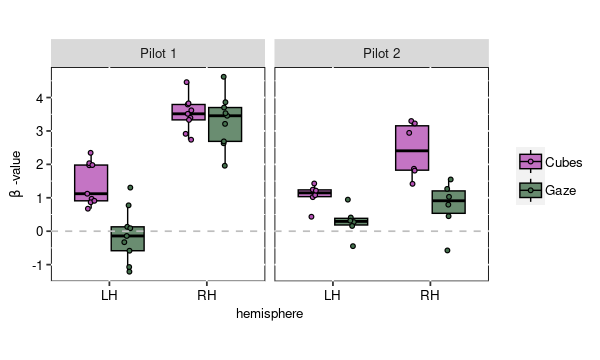

In [199]:
out_path <- "/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/gaze-motion/results/pilot/activations/GFP"

roi_ <- c("GFP")
cons_ <- c("Gaze", "Cubes")
# hemisphere_ <- 'LH'

filtered_data = filter(
                activations_df, 
                subject_type == 'pilot' &
                task %in% c('gc', 'gic') &
                condition %in%  cons_ &
                roi %in% roi_  
                # hemisphere %in% c(hemisphere_)
)

options(repr.plot.width=5, repr.plot.height=3)


p1 <- ggplot(filtered_data, aes(x = hemisphere, y = y, col=condition)) + 
    geom_boxplot(aes(fill = condition), alpha = .8, colour="black", size=0.4, outlier.shape = NA) +
    scale_fill_manual(labels = c("Cubes", "Gaze"), values=c("#b551b5", "#45714e")) + 
    # geom_violinhalf(aes(x = hemisphere, fill = condition), colour="white", flip = c(1, 3), width=1, alpha=0.6, position="identity") +
    geom_point(aes(x = hemisphere, fill = condition), color='black', size=1, pch=21, position=position_jitterdodge(jitter.width = 0.2, jitter.height = 0, dodge.width = 0.75)) +
    # scale_colour_manual(labels = c("cubes", "gaze"), values=c("#2c7bb6", "#d7191c")) + 
    geom_hline(yintercept=0, linetype="dashed", color = "grey") +
    ylab(expression(beta ~ '-value')) +
    theme(
        aspect.ratio = 1,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=8, angle=0),
        axis.text.y = element_text(color="black", 
                           size=8, angle=0),
        axis.title=element_text(size=8),
        strip.text = element_text(size = 8, hjust = 0.5, 
                              vjust = 0.5),
        legend.title=element_text(size=0),
        legend.text=element_text(size=8)
        ) +
    facet_wrap(~ participant, labeller=as_labeller(c("sub-00"="Pilot 1", "sub-0000"="Pilot 2")))

p1
ggsave(
    paste(out_path, 'boxplot.pdf', sep='/'),
    p1,
    scale = 1,
    width = 10,
    height = 5,
    units = "cm",
    # dpi = 300,
    # device = cairo_pdf
)

## Differences between conditions grouped by hemisphere

### Tests on individuals

In [16]:
hyps_hash = hash()


tasks <- I(list(c('gic', 'gc')))
condition_1 <- c('Gaze')
condition_2 <- c('Cubes')
hyps <- c(
    'conditionGaze = 0')
names <- c(
    'gic-gc_Gaze-Cubes')
non_intercept_con <- c(
    'b_conditionGaze'
)
hyps_hash[['GFP']] = data.frame(tasks, condition_1, condition_2, hyps, names, non_intercept_con)




In [172]:
roi_ = "GFP"
hemi_ = c("RH")
i = 1

hyps_df = hyps_hash[[roi_]]

filtered_data = filter(
    activations_df, 
    subject_type == 'pilot' &
    task %in% hyps_df[i, 1][[1]] &
    condition %in% c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]) & 
    roi == roi_ & 
    hemisphere %in% hemi_
)

In [61]:
summary(m)

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.9 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: y ~ condition + (condition || participant/run) 
   Data: filtered_data (Number of observations: 30) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 2) 
                  Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)         0.72      0.29     0.17     1.31 1.00     2861     1758
sd(conditionGaze)     0.94      0.29     0.38     1.51 1.00     3276     1833

~participant:run (Number of levels: 15) 
                  Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)         0.53      0.18     0.17     0.91 1.00     1120     1101
sd(conditionGaze)     0.21      0.15     0.01     0.56 1.00     2017     1656

Population-Level Effects: 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept         1.25      0.58     0.07     2.43 

In [183]:
mf_ <- bf(
    y ~ condition + (condition || run),
    # y ~ condition + (condition || participant/run), 
    # y ~ condition + (condition || participant) + (condition || participant:run), 
    family=gaussian(link="identity")
)
get_prior(mf_,  data = filtered_data)

### without participants as random effect
priors_ = c(
    set_prior('normal(0, 5)', class='Intercept'),
    set_prior('normal(0, 1)', class='b', coef="conditionGaze"),
    
    # set_prior('lognormal(0, 1)', class='sd'),
    set_prior('normal(.5, .5)', class='sd', coef='Intercept', group='run'),
    set_prior('normal(.3, .5)', class='sd', coef='conditionGaze', group='run'),
    
    # set_prior("lkj(2)",class="cor"),
   
    set_prior('lognormal(0.5, 0.5)', class='sigma')#,
)

## with participants as random effect
# priors_ = c(
#     set_prior('normal(0, 5)', class='Intercept'),
#     set_prior('normal(0, 1)', class='b', coef="conditionGaze"),
#     # set_prior('normal(0, 1)', class='b', coef="conditionIris"),
    
#     # set_prior('lognormal(0.3, 0.5)', class='sd'),
#     set_prior('normal(.8, 0.5)', class='sd', coef='Intercept', group='participant'),
#     set_prior('normal(1, .5)', class='sd', coef='conditionGaze', group='participant'),
    
#     set_prior('normal(0.8, .5)', class='sd', coef='Intercept', group='participant:run'),
#     set_prior('normal(0.2, .5)', class='sd', coef='conditionGaze', group='participant:run'),
    
#     # set_prior("lkj(1)",class="cor"),   
    
#     set_prior('lognormal(0.5, 0.5)', class='sigma')#,
# )




prior                  class     coef          group resp dpar nlpar lb ub
1                        b                                                  
2                        b         conditionGaze                            
3 student_t(3, 3.1, 2.5) Intercept                                          
4 student_t(3, 0, 2.5)   sd                                            0    
5                        sd                      run                        
6                        sd        conditionGaze run                        
7                        sd        Intercept     run                        
8 student_t(3, 0, 2.5)   sigma                                         0    
  source 
1 default
2 default
3 default
4 default
5 default
6 default
7 default
8 default

In [185]:
roi_ = "GFP"
hemi_ = c("RH")
i = 1

filtered_data = filter(
    activations_df, 
    subject_type == 'pilot' &
    task %in% hyps_df[i, 1][[1]] &
    condition %in% c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]) & 
    roi == roi_ & 
    hemisphere %in% hemi_
)


m = brm(
    mf_, 
    data = filtered_data, 
    prior = priors_,
    sample_prior = TRUE, 
    # sample_prior = "only", 
    chains = 4,
    cores = 4,
    save_pars = save_pars(all=TRUE),
    control = list(adapt_delta = 0.9, max_treedepth = 20)
)

Compiling Stan program...

Start sampling



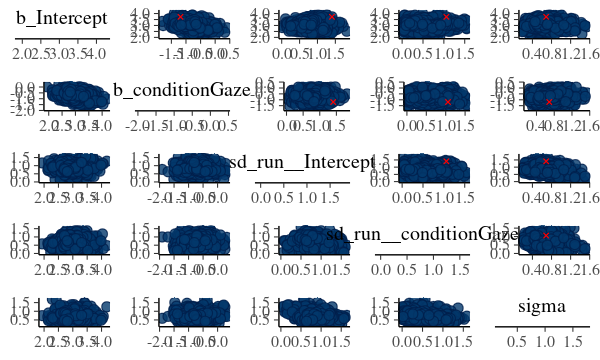

In [178]:
pairs(m, np=nuts_params(m))

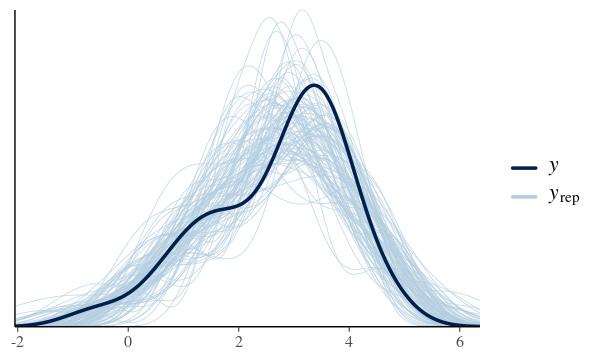

In [186]:
pp_check(m, ndraw=100)

In [173]:
summary(m)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: y ~ condition + (condition | participant/run) 
   Data: filtered_data (Number of observations: 30) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Group-Level Effects: 
~participant (Number of levels: 2) 
                             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                    0.88      0.38     0.22     1.68 1.00     2112
sd(conditionGaze)                1.09      0.37     0.49     1.89 1.00     3955
cor(Intercept,conditionGaze)     0.30      0.48    -0.68     0.98 1.00     2162
                             Tail_ESS
sd(Intercept)                    1283
sd(conditionGaze)                2640
cor(Intercept,conditionGaze)     2159

~participant:run (Number of levels: 15) 
                             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
sd(Intercept)                    0.85      0.22     0.51     1.37 1.01

Hypothesis Tests for class b:
           Hypothesis Estimate Est.Error CI.Lower CI.Upper Evid.Ratio Post.Prob
1 (conditionGaze) = 0    -0.74      0.28    -1.28    -0.16       0.18      0.15
  Star
1    *
---
'CI': 90%-CI for one-sided and 95%-CI for two-sided hypotheses.
'*': For one-sided hypotheses, the posterior probability exceeds 95%;
for two-sided hypotheses, the value tested against lies outside the 95%-CI.
Posterior probabilities of point hypotheses assume equal prior probabilities.


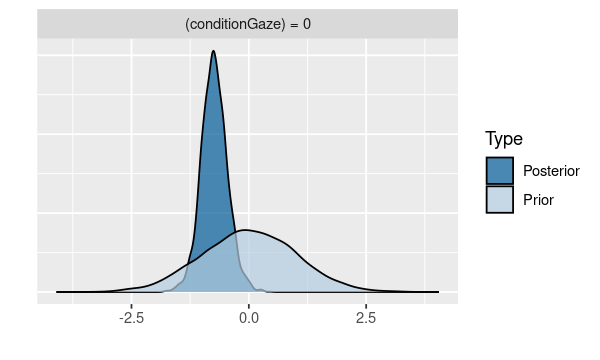

In [187]:
hyp <- hypothesis(m, 'conditionGaze = 0')
print(hyp)
plot(hyp)


### Main loop

#### specify hypothesis

In [3]:
hyps_hash = hash()


tasks <- I(list(c('gic', 'gc')))
condition_1 <- c('Gaze')
condition_2 <- c('Cubes')
hyps <- c(
    'conditionGaze = 0')
names <- c(
    'gic-gc_Gaze-Cubes')
non_intercept_con <- c(
    'b_conditionGaze'
)
hyps_hash[['GFP']] = data.frame(tasks, condition_1, condition_2, hyps, names, non_intercept_con)




#### specify model and priors

In [5]:
mf_ <- bf(
    y ~ condition + (condition || run),
    # y ~ condition + (condition || participant/run), 
    family=gaussian(link="identity")
)
# get_prior(mf_,  data = filtered_data)

### without participants as random effect
priors_ = c(
    set_prior('normal(0, 5)', class='Intercept'),
    set_prior('normal(0, 1)', class='b', coef="conditionGaze"),
    
    # set_prior('lognormal(0, 1)', class='sd'),
    set_prior('normal(.5, .5)', class='sd', coef='Intercept', group='run'),
    set_prior('normal(.3, .5)', class='sd', coef='conditionGaze', group='run'),
    
    # set_prior("lkj(2)",class="cor"),
   
    set_prior('lognormal(0.5, 0.5)', class='sigma')#,
)

## with participants as random effect
# priors_ = c(
#     set_prior('normal(0, 5)', class='Intercept'),
#     set_prior('normal(0, 1)', class='b', coef="conditionGaze"),
    
#     # set_prior('lognormal(0.3, 0.5)', class='sd'),
#     set_prior('normal(.8, 0.5)', class='sd', coef='Intercept', group='participant'),
#     set_prior('normal(1, .5)', class='sd', coef='conditionGaze', group='participant'),
    
#     set_prior('normal(0.8, .5)', class='sd', coef='Intercept', group='participant:run'),
#     set_prior('normal(0.2, .5)', class='sd', coef='conditionGaze', group='participant:run'),
    
#     # set_prior("lkj(1)",class="cor"),   
    
#     set_prior('lognormal(0.5, 0.5)', class='sigma')#,
# )

In [6]:

load_fitted_models = FALSE

out_path <- file.path(base_path, "results/pilot/activations/")

# out_path = "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/pilot/activations/fwhm-5_run"
dir.create(out_path, showWarnings = FALSE)

for (roi_ in c('GFP')){
    
    print(roi_)
    dir.create(file.path(out_path, roi_), showWarnings = FALSE)
    
    hyps_df = hyps_hash[[roi_]]
    
    for (hemi_ in c('LH', 'RH')){
        print(hemi_)

        for(i in 1:nrow(hyps_df)) {       # for-loop over rows
        # for (hyp_ in hyp_hash){

            filtered_data = filter(
                activations_df, 
                subject_type == 'pilot' &
                task %in% hyps_df[i, 1][[1]] &
                condition %in% c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]) & 
                roi == roi_ & 
                hemisphere %in% c(hemi_))
            
            print(c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]))

            if (dim(filtered_data)[1] != 0) {

                ### check if fitted model exists and can be loaded
                file_type = ".rds"
                fp_model = file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                
                if(load_fitted_models & file.exists(fp_model)) {
                    m <- readRDS(fp_model)
                } else {
                    
                    capture.output({
                        m = brm(
                            mf_, 
                            data = filtered_data, 
                            prior = priors_,
                            sample_prior = 'only', 
                            chains = 4,
                            # iter = 1,
                            cores = 4,
                            save_pars = save_pars(all=TRUE),
                            control = list(adapt_delta = 0.9, max_treedepth = 20))
                        }, 
                    file="rstan.modelfit.output")
                    
                    # prior predicitive check
                    file_type = "_prior_predictive_check.pdf"
                    pdf(file.path(file.path(out_path, roi_), 
                                      paste(
                                        paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                        file_type, sep = ""
                                        )
                                  ),
                        width = 15, # The width of the plot in inches
                        height = 10
                        )
                    plot(pp_check(m, ndraw=50))
                    dev.off()
                

                    # 
                    capture.output({
                        m = brm(
                            mf_, 
                            data = filtered_data, 
                            prior = priors_,
                            sample_prior = TRUE, 
                            chains = 4,
                            # iter = 1,
                            cores = 4,
                            save_pars = save_pars(all=TRUE),
                            control = list(adapt_delta = 0.9, max_treedepth = 20))
                        }, 
                    file="rstan.modelfit.output")

                    ### store results                
                    file_type = ".rds"
                    saveRDS(m, fp_model)
                    
                    # posterior predicitive check
                    file_type = "_posterior_predictive_check.pdf"
                    pdf(file.path(file.path(out_path, roi_), 
                                      paste(
                                        paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                        file_type, sep = ""
                                        )
                                  ),
                        width = 15, # The width of the plot in inches
                        height = 10
                        )
                    plot(pp_check(m, ndraw=50))
                    dev.off()
                    
                }

                file_type = "_summary.txt"
                s <- summary(m)
                capture.output(s, file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )

                file_type = "_conditional-effects.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 3, # The width of the plot in inches
                    height = 3
                    )
                plot(conditional_effects(m, robust = TRUE), points = TRUE, point_args=c(size=0.5,width=0.1), ask = FALSE, ylim=c(3,-3))
                dev.off()

                
                file_type = "_posterior_draws.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 4, # The width of the plot in inches
                    height = 3
                    )
                print(m %>%
                    gather_draws(!!sym(paste0(get_variables(m)[1])), !!sym(paste0(get_variables(m)[2]))) %>%
                    mutate() %>%
                    ggplot(aes(x = .variable, y = .value)) +
                    stat_halfeye(size=0.01))
                dev.off()

                
                hyp <- hyps_df[i, 4][[1]]
                hyp <- hypothesis(m, hyp)
                file_type = "_hypothesis-test_BF.txt"
                capture.output(hyp[1], file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )
                
                file_type = "_posterior-probability.txt"
                pp_ = colMeans(hyp$samples > 0)
                capture.output(pp_, file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )
                
                
                file_type = "_hypothesis-test_prior-posterior.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 4, # The width of the plot in inches
                    height = 3
                    )
                plot(hyp, chars = NULL)
                dev.off()
                
                #
                file_type = "_pairs.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, hemi_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 15, # The width of the plot in inches
                    height = 10
                    )
                plot(pairs(m))
                dev.off()
                
            }else {
                
                print("*** NOT DATA FOUND FOR...")
                print(hyps_df[i, 1][[1]])
                print(c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]))
                print(roi_)
                print(c(hemi_))
                
            }
        }
    }    
}

[1] "GFP"
[1] "LH"
[1] "Gaze"  "Cubes"


Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling



[1] "RH"
[1] "Gaze"  "Cubes"


Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling

Warning message:
“There were 1 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.9 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


In [8]:
r <- report(m)

Warning message:
“Response residuals not available to calculate mean square error. (R)MSE
  is probably not reliable.”
Start sampling




SAMPLING FOR MODEL '9b7f06a70b34adcbabe7525904adb6bf' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.7e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.255239 seconds (Warm-up)
Chain 1:                0.263992 seconds (Sampling)


Warning message:
“Response residuals not available to calculate mean square error. (R)MSE
  is probably not reliable.”


In [18]:
r[4]

[1] "We fitted a Bayesian linear mixed model (estimated using MCMC sampling with 4 chains of 2000 iterations and a warmup of 1000) to predict y with condition (formula: y ~ condition). The model included run as random effects (formula: list(~1 | run, ~0 + condition | run)). Priors over parameters were set as normal (mean = 0.30, SD = 0.50) distributions. The model's explanatory power is substantial (R2 = 0.82, 95% CI [0.53, 0.98], adj. R2 = 0.68) and the part related to the fixed effects alone (marginal R2) is of 0.09 (95% CI [3.89e-06, 0.20]).  Within this model:\n\n  - The effect of b Intercept (Median = 3.06, 95% CI [2.49, 3.59]) has a 100.00% probability of being positive (> 0), 100.00% of being significant (> 0.06), and 100.00% of being large (> 0.38). The estimation successfully converged (Rhat = 1.001) and the indices are reliable (ESS = 3554)\n  - The effect of b conditionGaze (Median = -0.74, 95% CI [-1.26, -0.20]) has a 99.60% probability of being negative (< 0), 99.25% of being significant (< -0.06), and 91.17% of being large (< -0.38). The estimation successfully converged (Rhat = 1.002) and the indices are reliable (ESS = 1832)\n\nFollowing the Sequential Effect eXistence and sIgnificance Testing (SEXIT) framework, we report the median of the posterior distribution and its 95% CI (Highest Density Interval), along the probability of direction (pd), the probability of significance and the probability of being large. The thresholds beyond which the effect is considered as significant (i.e., non-negligible) and large are |0.06| and |0.38| (corresponding respectively to 0.05 and 0.30 of the outcome's SD). Convergence and stability of the Bayesian sampling has been assessed using R-hat, which should be below 1.01 (Vehtari et al., 2019), and Effective Sample Size (ESS), which should be greater than 1000 (Burkner, 2017)."

## Differences between hemispheres grouped by condition

### specify hypothesis

In [348]:
hyps_hash = hash()


tasks <- I(list(c('gic', 'gc')))
condition_1 <- c('LH')
condition_2 <- c('RH')
hyps <- c(
    'hemisphereRH = 0')
names <- c(
    'gic-gc_LH-RH')
non_intercept_con <- c(
    'b_hemisphereRH'
)
hyps_hash[['GFP']] = data.frame(tasks, condition_1, condition_2, hyps, names, non_intercept_con)




### specify model and priors

In [ ]:
mf_ <- bf(
    y ~ hemisphere + (hemisphere || run),
    # y ~ hemisphere + (hemisphere || participant/run), 
    family=gaussian(link="identity")
)
# get_prior(mf_,  data = activations_df)

### without participants as random effect
priors_ = c(
    set_prior('normal(0, 5)', class='Intercept'),
    set_prior('normal(0, 1)', class='b', coef="hemisphereRH"),
    
    # set_prior('lognormal(0, 1)', class='sd'),
    set_prior('normal(.5, .5)', class='sd', coef='Intercept', group='run'),
    set_prior('normal(.3, .5)', class='sd', coef='hemisphereRH', group='run'),
    
    # set_prior("lkj(2)",class="cor"),
   
    set_prior('lognormal(0.5, 0.5)', class='sigma')#,
)

## with participants as random effect
# priors_ = c(
#     set_prior('normal(0, 5)', class='Intercept'),
#     set_prior('normal(0, 1)', class='b', coef="hemisphereRH"),
    
#     # set_prior('lognormal(0.3, 0.5)', class='sd'),
#     set_prior('normal(.8, 0.5)', class='sd', coef='Intercept', group='participant'),
#     set_prior('normal(1, .5)', class='sd', coef='hemisphereRH', group='participant'),
    
#     set_prior('normal(0.8, .5)', class='sd', coef='Intercept', group='participant:run'),
#     set_prior('normal(0.2, .5)', class='sd', coef='hemisphereRH', group='participant:run'),
    
#     # set_prior("lkj(1)",class="cor"),   
    
#     set_prior('lognormal(0.5, 0.5)', class='sigma')#,
# )

### run

In [350]:

load_fitted_models = FALSE

out_path = "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/pilot/activations/fwhm-5_run"
dir.create(out_path, showWarnings = FALSE)

for (roi_ in c('GFP')){
    
    print(roi_)
    dir.create(file.path(out_path, roi_), showWarnings = FALSE)
    
    hyps_df = hyps_hash[[roi_]]
    
    for (con_ in c('Cubes', 'Gaze')){

        for(i in 1:nrow(hyps_df)) {       # for-loop over rows
        # for (hyp_ in hyp_hash){

            filtered_data = filter(
                activations_df, 
                subject_type == 'pilot' &
                task %in% hyps_df[i, 1][[1]] &
                condition == con_ & 
                roi == roi_)
            
            print(con_)
            print(c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]))

            if (dim(filtered_data)[1] != 0) {

                ### check if fitted model exists and can be loaded
                file_type = ".rds"
                fp_model = file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                
                if(load_fitted_models & file.exists(fp_model)) {
                    m <- readRDS(fp_model)
                } else {

                    ## truncated priors:  effect only
                    priors_ = c(
                        set_prior('normal(0, 10)', class='b', lb=-5, ub=5)
                    )

                    #
                    capture.output({
                        m = brm(
                            mf_, 
                            data = filtered_data, 
                            prior = priors_,
                            sample_prior = TRUE, 
                            family = gaussian(link="identity"),
                            chains = 4,
                            # iter = 1,
                            cores = 4,
                            save_pars = save_pars(all=TRUE),
                            control = list(adapt_delta = 0.9, max_treedepth = 20))
                        }, 
                    file="rstan.modelfit.output")

                    ### store results                
                    file_type = ".rds"
                    saveRDS(m, fp_model)
                    
                }

                file_type = "_summary.txt"
                s <- summary(m)
                capture.output(s, file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )

                file_type = "_conditional-effects.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 3, # The width of the plot in inches
                    height = 3
                    )
                plot(conditional_effects(m, robust = TRUE), points = TRUE, point_args=c(size=0.5,width=0.1), ask = FALSE, ylim=c(3,-3))
                dev.off()

                
                file_type = "_posterior_draws.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 4, # The width of the plot in inches
                    height = 3
                    )
                print(m %>%
                    gather_draws(!!sym(paste0(get_variables(m)[1])), !!sym(paste0(get_variables(m)[2]))) %>%
                    mutate() %>%
                    ggplot(aes(x = .variable, y = .value)) +
                    stat_halfeye(size=0.01))
                dev.off()

                
                hyp <- hyps_df[i, 4][[1]]
                hyp <- hypothesis(m, hyp)
                file_type = "_hypothesis-test_BF.txt"
                capture.output(hyp[1], file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )
                
                file_type = "_posterior-probability.txt"
                pp_ = colMeans(hyp$samples > 0)
                capture.output(pp_, file=file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = "")
                                  )
                               )
                
                
                file_type = "_hypothesis-test_prior-posterior.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 4, # The width of the plot in inches
                    height = 3
                    )
                plot(hyp, chars = NULL)
                dev.off()
                
                #
                file_type = "_pairs.pdf"
                pdf(file.path(file.path(out_path, roi_), 
                                  paste(
                                    paste(paste(roi_, con_, sep='-'), hyps_df[i, 5][[1]], sep="_"), 
                                    file_type, sep = ""
                                    )
                              ),
                    width = 15, # The width of the plot in inches
                    height = 10
                    )
                plot(pairs(m))
                dev.off()
                
            }else {
                
                print("*** NOT DATA FOUND FOR...")
                print(hyps_df[i, 1][[1]])
                print(c(hyps_df[i, 2][[1]], hyps_df[i, 3][[1]]))
                print(roi_)
                print(c(con_))
                
            }
        }
    }    
}

[1] "GFP"
[1] "Cubes"
[1] "LH" "RH"


Compiling Stan program...

Start sampling



ERROR: Error in saveRDS(m, fp_model): error writing to connection


In [347]:
nrow(hyps_df)

NULL

In [ ]:
hyp <- hyps_df[i, 4][[1]]
hyp <- hypothesis(m, hyp)

# Correlations of HRFs

## Load data

In [3]:
# load and prepare data

base_path <- "/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/gaze-motion"
tc_df <- read.csv(file = file.path(base_path, "data/pilot/hrf_estimates/tc_df_allROIs.csv"), sep=',')
# tc_df <- read.csv(file = "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/data/pilot/hrf_estimates/tc_df_fwhm8.csv", sep='\t', check.names=FALSE)


tc_df$participant = factor(tc_df$participant)
tc_df$session = factor(tc_df$session)
tc_df$task = factor(tc_df$task)
tc_df$event_type = factor(tc_df$event_type)
tc_df$covariate = factor(tc_df$covariate)

tc_df = melt(tc_df, id=c("participant", "session", 'task', 'event_type', 'covariate', 'time'))


### load dataframe with pairings
base_path <- "/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/gaze-motion"
comparison_df <- read.csv(file = file.path(base_path, "data/pilot/hrf_estimates/correlation-analysis_selection.csv"), sep=',')
# comparison_df <- read.csv(file = "/Users/mariusgorner/ownCloud/PhD/projects/scientific/gaze-motion/results/from_nideconv/correlation-analysis_selection.csv", sep='\t', na.strings = c("", "NA"))
# comparison_df <- read.csv(file = "/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/data/pilot/hrf_estimates/correlation-analysis_selection.csv", sep='\t', na.strings = c("", "NA"))


comparison_df = comparison_df[!apply(comparison_df == "", 1, all),]
rownames(comparison_df) <- 1:nrow(comparison_df)



In [5]:
unique(tc_df$variable)

[1] GFP_left               GFP_right              fMotionArea_left      
[4] fMotionArea_right      GazeCubes_left         GazeCubes_right       
[7] Marquardt2017GFP_left  Marquardt2017GFP_right
8 Levels: GFP_left GFP_right fMotionArea_left ... Marquardt2017GFP_right

## Compute the correlations for pairs spcified in correlation-analysis_selection.csv

In [4]:

# options(warn=-1)



store_plots = FALSE
    
for(i in 1:nrow(comparison_df)) { 

    sub_id <- comparison_df[i,]$participant
    roi_1 <- comparison_df[i,]$roi_1
    roi_2 <- comparison_df[i,]$roi_2
    ses_1 <- comparison_df[i,]$session_1
    ses_2 <- comparison_df[i,]$session_2
    task_1 <- comparison_df[i,]$task_1
    task_2 <- comparison_df[i,]$task_2
    c_1 = comparison_df[i,]$c_1
    c_2 = comparison_df[i,]$c_2
    

    if (store_plots) {
        base_path <- "/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/gaze-motion"
        out_path <- file.path(base_path, sub_id)
        # out_path <- paste("/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/results/pilot/hrf_correlations", sub_id, sep="/")
        dir.create(file.path(out_path), showWarnings = FALSE)
        out_path <- paste(out_path, paste(task_1, task_2, roi_1, roi_2, sep="_"), sep="/")
        dir.create(file.path(out_path), showWarnings = FALSE)
        
        filename <- paste(sub_id, ses_1, ses_2, task_1, task_2, roi_1, roi_2, c_1, c_2, sep="_")
        fp_ <- paste(out_path, filename, sep="/")
        print(filename)
    }
    
    

    if (!((sub_id == 'sub_00') & (c_1 %in% c('Gaze_2', 'Gaze_3') | c_2 %in% c('Gaze_2', 'Gaze_3')))) { ### Filter out missing trials for sub-00
    
        f_dat <- filter(
            tc_df,
            (participant == sub_id
               & session == ses_1
               & task == task_1
               & variable == roi_1
               & event_type == c_1) 
            | (participant == sub_id
               & session == ses_2
               & task == task_2
               & variable == roi_2
               & event_type == c_2) 
        )

        # filter out missing values (if correlation-analysis_selection.csv contains pairs that do not exist)
        f_dat <- f_dat[complete.cases(f_dat), ]

        if (nrow(f_dat) > 0) {
        
            # print(head(f_dat))

            options(repr.plot.width=13, repr.plot.height=7)

            if (roi_1 == roi_2) {

                p <- ggplot(f_dat, aes(x=time, y=value, colour=event.type, label=variable)) + 
                    geom_line(aes(x = time, y = value, colour=event.type)) 

                r_ = cor(filter(f_dat,
                       event_type == c_1)$value,
                    filter(f_dat,
                       event_type == c_2)$value
                )

                bf_ <- correlationBF(
                    filter(f_dat,
                       event_type == c_1)$value,
                    filter(f_dat,
                       event_type == c_2)$value
                )
                invisible(bf_)

                samples <- correlationBF(
                    filter(f_dat,
                       event_type == c_1)$value,
                    filter(f_dat,
                       event_type == c_2)$value,
                    posterior = TRUE, iterations = 10000
                )
                invisible(samples)

                if (store_plots) {

                    f_dat_label <- f_dat %>% filter(time == 0.075*80)
                    f_dat_label = f_dat_label %>% 
                        mutate(label = paste(variable, event_type, sep=", "))

                    p <- ggplot(f_dat, aes(x=time, y=value, colour=event_type, label=variable)) + 
                        geom_line(aes(x = time, y = value, colour=event_type, size=3)) +
                        geom_label_repel(aes(label=label), data = f_dat_label, size=7) + 
                        annotate(geom="text", x=11, y=0.55, label=paste("r = ", round(r_, 2), sep=""), color="black", hjust = "left", size=7) + 
                        annotate(geom="text", x=11, y=0.51, label=paste("rho = ", round(median(samples[,"rho"]), 2), sep=""), color="black", hjust = "left", size=7) +
                        annotate(geom="text", x=11, y=0.47, label=paste("BF = ", format(extractBF(bf_)$bf, scientific = TRUE, digits=3), sep=""), color="black", hjust = "left", size=7) + 
                        theme(legend.position = "none") + 
                        theme(axis.text.x= element_text(size=15), axis.title=element_text(size=20)) + 
                        theme(axis.text.y= element_text(size=15), axis.title=element_text(size=20))



                    ggsave(
                        paste(fp_, "png", sep="."), 
                        width = 13,
                        height = 7)
                }

            }else {


                r_ = cor(filter(f_dat,
                       variable == roi_1)$value,
                    filter(f_dat,
                       variable == roi_2)$value
                )

                bf_ <- correlationBF(
                    filter(f_dat,
                       variable == roi_1)$value,
                    filter(f_dat,
                       variable == roi_2)$value
                )
                invisible(bf_)

                samples <- correlationBF(
                    filter(f_dat,
                       variable == roi_1)$value,
                    filter(f_dat,
                       variable == roi_2)$value,
                    posterior = TRUE, iterations = 10000
                )
                invisible(samples)

                if (store_plots) {

                    f_dat_label <- f_dat %>% filter(time == 0.075*80)
                    f_dat_label = f_dat_label %>% 
                        mutate(label = paste(variable, event_type, sep=", "))


                    p <- ggplot(f_dat, aes(x=time, y=value, colour=variable, label=event_type)) + 
                        geom_line(aes(x = time, y = value, colour=variable, size=3)) +
                        geom_label_repel(aes(label=label), data = f_dat_label, size=7) + 
                        annotate(geom="text", x=11, y=0.55, label=paste("r = ", round(r_, 2), sep=""), color="black", hjust = "left", size=7) + 
                        annotate(geom="text", x=11, y=0.51, label=paste("rho = ", round(median(samples[,"rho"]), 2), sep=""), color="black", hjust = "left", size=7) +
                        annotate(geom="text", x=11, y=0.47, label=paste("BF = ", format(extractBF(bf_)$bf, scientific = TRUE, digits=3), sep=""), color="black", hjust = "left", size=7) + 
                        theme(legend.position = "none") + 
                        theme(axis.text.x= element_text(size=15), axis.title=element_text(size=20)) + 
                        theme(axis.text.y= element_text(size=15), axis.title=element_text(size=20))



                    ggsave(
                        paste(fp_, "png", sep="."), 
                        width = 13,
                        height = 7)
                }

            }
        }
    }    

    
    comparison_df[i,'r'] = r_
    comparison_df[i,'rho'] = round(median(samples[,"rho"]), 2)
    if ((format(extractBF(bf_)$bf, scientific = TRUE, digits=3) == "NA") & (r_ > 0.9)) {
        comparison_df[i,'bf'] = 1e100
    }else{
        comparison_df[i,'bf'] = as.double(format(extractBF(bf_)$bf, scientific = TRUE))
    }
}

comparison_df[,'target_id_1'] = as.integer(str_split_fixed(comparison_df$c_1, '_', 2)[,2])
comparison_df[,'target_id_2'] = as.integer(str_split_fixed(comparison_df$c_2, '_', 2)[,2])
comparison_df[,'target_id_diff'] = as.character(abs(comparison_df[,'target_id_1'] - comparison_df[,'target_id_2']))
comparison_df[,'ROI1'] = str_split_fixed(comparison_df$roi_1, '_', 2)[,1]
comparison_df[,'ROI2'] = str_split_fixed(comparison_df$roi_2, '_', 2)[,1]
comparison_df[,'hemisphere1'] = str_split_fixed(comparison_df$roi_1, '_', 2)[,2]
comparison_df[,'hemisphere2'] = str_split_fixed(comparison_df$roi_2, '_', 2)[,2]
ll_ <- paste(str_split_fixed(comparison_df$c_1, '_', 2)[,1], str_split_fixed(comparison_df$c_2, '_', 2)[,1], sep="_")
ll_ <- gsub("Gaze-Cubes", "Cubes-Gaze", ll_)
comparison_df[,'task_combination'] = ll_
# comparison_df[,'tasks_identical'] = comparison_df$task_1 == comparison_df$task_2
# comparison_df["tasks_identical"][comparison_df["tasks_identical"] == TRUE] <- comparison_df["task_1"][comparison_df["tasks_identical"] == TRUE]
# comparison_df["tasks_identical"][comparison_df["tasks_identical"] == FALSE] <- "go~co"


Independent-candidate M-H acceptance rate: 91%

Independent-candidate M-H acceptance rate: 74%

Independent-candidate M-H acceptance rate: 84%

Independent-candidate M-H acceptance rate: 78%

Warning message in genhypergeo_series_pos(U = c((n - 1)/2, (n - 1)/2), L = ((n + :
“Series not converged.”
Independent-candidate M-H acceptance rate: 74%

Independent-candidate M-H acceptance rate: 90%

Independent-candidate M-H acceptance rate: 84%

Independent-candidate M-H acceptance rate: 97%

Independent-candidate M-H acceptance rate: 77%

Independent-candidate M-H acceptance rate: 80%

Independent-candidate M-H acceptance rate: 82%

Independent-candidate M-H acceptance rate: 94%

Independent-candidate M-H acceptance rate: 85%

Independent-candidate M-H acceptance rate: 99%

Independent-candidate M-H acceptance rate: 85%

Independent-candidate M-H acceptance rate: 76%

Independent-candidate M-H acceptance rate: 96%

Independent-candidate M-H acceptance rate: 77%

Independent-candidate M-H acc

## Correlation of correlations

### make prediction dataframe

In [155]:
comparison_df

participant roi_1                  roi_2                  session_1
1   sub_00      fMotionArea_left       fMotionArea_right      ses_com  
2   sub_00      fMotionArea_left       fMotionArea_right      ses_com  
3   sub_00      fMotionArea_left       fMotionArea_right      ses_com  
4   sub_00      fMotionArea_left       fMotionArea_right      ses_com  
5   sub_00      fMotionArea_left       fMotionArea_right      ses_com  
6   sub_00      fMotionArea_left       fMotionArea_left       ses_com  
7   sub_00      fMotionArea_right      fMotionArea_right      ses_com  
8   sub_00      Marquardt2017GFP_left  Marquardt2017GFP_right ses_com  
9   sub_00      Marquardt2017GFP_left  Marquardt2017GFP_right ses_com  
10  sub_00      Marquardt2017GFP_left  Marquardt2017GFP_right ses_com  
11  sub_00      Marquardt2017GFP_left  Marquardt2017GFP_right ses_com  
12  sub_00      Marquardt2017GFP_left  Marquardt2017GFP_right ses_com  
13  sub_00      Marquardt2017GFP_left  Marquardt2017GFP_left  ses_com  
14  sub_00      Marquardt2017GFP_right Marquardt2017GFP_right ses_com  
15  sub_00      GFP_left               GFP_right              ses_com  
16  sub_00      GFP_left               GFP_right              ses_com  
17  sub_00      GFP_left               GFP_right              ses_com  
18  sub_00      GFP_left               GFP_right              ses_com  
19  sub_00      GFP_left               GFP_right              ses_com  
20  sub_00      GFP_left               GFP_left               ses_com  
21  sub_00      GFP_right              GFP_right              ses_com  
22  sub_0000    fMotionArea_left       fMotionArea_right      ses_sep  
23  sub_0000    fMotionArea_left       fMotionArea_right      ses_sep  
24  sub_0000    fMotionArea_left       fMotionArea_right      ses_sep  
25  sub_0000    fMotionArea_left       fMotionArea_right      ses_sep  
26  sub_0000    fMotionArea_left       fMotionArea_right      ses_sep  
27  sub_0000    fMotionArea_left       fMotionArea_right      ses_sep  
28  sub_0000    fMotionArea_left       fMotionArea_right      ses_sep  
29  sub_0000    fMotionArea_left       fMotionArea_right      ses_sep  
30  sub_0000    fMotionArea_left       fMotionArea_right      ses_sep  
⋮   ⋮           ⋮                      ⋮                      ⋮        
128 sub_0000    GFP_left               GFP_right              ses_sep  
129 sub_0000    GFP_left               GFP_right              ses_sep  
130 sub_0000    GFP_left               GFP_right              ses_sep  
131 sub_0000    GFP_left               GFP_right              ses_sep  
132 sub_0000    GFP_left               GFP_right              ses_sep  
133 sub_0000    GFP_left               GFP_right              ses_sep  
134 sub_0000    GFP_left               GFP_left               ses_sep  
135 sub_0000    GFP_right              GFP_right              ses_sep  
136 sub_0000    GFP_left               GFP_left               ses_sep  
137 sub_0000    GFP_right              GFP_right              ses_sep  
138 sub_0000    GFP_left               GFP_right              ses_sep  
139 sub_0000    GFP_left               GFP_right              ses_sep  
140 sub_0000    GFP_left               GFP_right              ses_sep  
141 sub_0000    GFP_left               GFP_right              ses_sep  
142 sub_0000    GFP_left               GFP_right              ses_sep  
143 sub_0000    GFP_left               GFP_right              ses_sep  
144 sub_0000    GFP_left               GFP_right              ses_sep  
145 sub_0000    GFP_left               GFP_right              ses_sep  
146 sub_0000    GFP_left               GFP_right              ses_sep  
147 sub_0000    GFP_left               GFP_right              ses_sep  
148 sub_0000    GFP_left               GFP_left               ses_sep  
149 sub_0000    GFP_left               GFP_left               ses_sep  
150 sub_0000    GFP_left               GFP_left               ses_sep  
151 sub_0000    GFP_left               GFP_l

In [5]:

###########################
####### SET PARING ########
###########################

r_1 <- c('fMotionArea')
r_2 <- c('GFP')

###########################
###########################
###########################


corr_df <- data.frame(matrix(ncol = 9, nrow = 0))
x <- c("participant", paste(r_1, collapse='_'), paste(r_2, collapse='_'), "hemi", "con", "target", "predicted_corr", "ct_name", "hemi_name")
colnames(corr_df) <- x

row_counter <- 0

for (sub_ in unique(comparison_df[,"participant"])) {

    for (con_1 in unique(comparison_df[,"c_1"])) {

        for (con_2 in unique(comparison_df[,"c_2"])) {

            for (hemi_1 in unique(comparison_df[,"hemisphere1"])) {

                for (hemi_2 in unique(comparison_df[,"hemisphere2"])) {

                    
                    r_1_val = filter(
                        comparison_df,
                        participant == sub_
                        & (roi_1 %in% c(paste(r_1, hemi_1, sep='_')) & roi_2 %in% c(paste(r_1, hemi_2, sep='_'))) 
                        & (c_1 %in% c(con_1) & c_2 %in% c(con_2)) 
                    )$rho
                    
                    r_2_val = filter(
                        comparison_df,
                        participant == sub_
                        & (roi_1 %in% c(paste(r_2, hemi_1, sep='_')) & roi_2 %in% c(paste(r_2, hemi_2, sep='_'))) 
                        & (c_1 %in% c(con_1) & c_2 %in% c(con_2)) 
                    )$rho
                    
                    if (length(r_1_val) > 0) {
                        
                        c1 <- str_split(con_1, '_')[[1]][1]
                        t1 <- str_split(con_1, '_')[[1]][2]

                        c2 <- str_split(con_2, '_')[[1]][1]
                        t2 <- str_split(con_2, '_')[[1]][2]

                        # if (t1 != '2' | t2 != '2') {
                        
                            row_counter <- row_counter + 1
                            
                            corr_df[row_counter,]$participant <- sub_

                            corr_df[row_counter,][paste(r_1, collapse='_')] <- r_1_val
                            corr_df[row_counter,][paste(r_2, collapse='_')] <- r_2_val

                            if (hemi_1 == hemi_2) {
                                corr_df[row_counter,]$hemi <- "same"
                            } else {
                                corr_df[row_counter,]$hemi <- "different"
                            }

                            if (c1 == c2) {
                                corr_df[row_counter,]$con <- "same"
                            } else {
                                corr_df[row_counter,]$con <- "different"
                            }

                            if (t1 == t2) {
                                corr_df[row_counter,]$target <- "same"
                            } else {
                                corr_df[row_counter,]$target <- "different"
                            }

                            if (hemi_1 == hemi_2 & t1 == t2) {

                                corr_df[row_counter,]$predicted_corr <- "high"

                            }

                            if (hemi_1 == hemi_2 & t1 != t2) {

                                corr_df[row_counter,]$predicted_corr <- "low"

                            }

                            if (hemi_1 != hemi_2 & t1 == t2) {

                                corr_df[row_counter,]$predicted_corr <- "low"

                            }

                            if (hemi_1 != hemi_2 & t1 != t2) {

                                corr_df[row_counter,]$predicted_corr <- "high"

                            }
                        
                            if (t1 == '2' & t2 == '2') {

                                corr_df[row_counter,]$predicted_corr <- "high"

                            }

                            corr_df[row_counter,]$ct_name <- paste(con_1, con_2, sep='~')
                            corr_df[row_counter,]$hemi_name <- paste(hemi_1, hemi_2, sep='~')
                        
                        # }

                    }
                }
            }
        }
    }
}

### run 

In [8]:
corr_df.Lateralization <- melt(corr_df, id.vars=c('predicted_corr','participant'), measure.vars=c(paste(r_1, collapse='_'), paste(r_2, collapse='_')))


In [23]:
corr_df.Lateralization

predicted_corr participant variable    value
1  low            sub_00      fMotionArea  0.30
2  high           sub_00      fMotionArea  0.81
3  low            sub_00      fMotionArea  0.38
4  low            sub_00      fMotionArea  0.59
5  high           sub_00      fMotionArea  0.93
6  high           sub_00      fMotionArea  0.96
7  low            sub_00      fMotionArea  0.57
8  low            sub_0000    fMotionArea  0.55
9  high           sub_0000    fMotionArea  0.83
10 low            sub_0000    fMotionArea -0.16
11 low            sub_0000    fMotionArea  0.74
12 low            sub_0000    fMotionArea  0.03
13 high           sub_0000    fMotionArea  0.60
14 high           sub_0000    fMotionArea  0.70
15 high           sub_0000    fMotionArea  0.70
16 low            sub_0000    fMotionArea -0.08
17 low            sub_0000    fMotionArea  0.85
18 high           sub_0000    fMotionArea  0.89
19 high           sub_0000    fMotionArea  0.87
20 high           sub_0000    fMotionArea  0.96
21 high           sub_0000    fMotionArea  0.90
22 high           sub_0000    fMotionArea  0.53
23 low            sub_0000    fMotionArea  0.14
24 high           sub_0000    fMotionArea  0.92
25 low            sub_0000    fMotionArea  0.64
26 low            sub_0000    fMotionArea  0.37
27 low            sub_0000    fMotionArea  0.42
28 high           sub_0000    fMotionArea  0.97
29 high           sub_0000    fMotionArea  0.90
30 low            sub_0000    fMotionArea  0.81
⋮  ⋮              ⋮           ⋮           ⋮    
53 low            sub_0000    GFP         -0.45
54 high           sub_0000    GFP          0.79
55 high           sub_0000    GFP          0.17
56 high           sub_0000    GFP          0.51
57 low            sub_0000    GFP         -0.46
58 low            sub_0000    GFP          0.70
59 high           sub_0000    GFP          0.53
60 high           sub_0000    GFP          0.68
61 high           sub_0000    GFP         -0.21
62 high           sub_0000    GFP          0.68
63 high           sub_0000    GFP          0.19
64 low            sub_0000    GFP          0.32
65 high           sub_0000    GFP          0.81
66 low            sub_0000    GFP         -0.31
67 low            sub_0000    GFP          0.32
68 low            sub_0000    GFP          0.42
69 high           sub_0000    GFP          0.79
70 high           sub_0000    GFP          0.81
71 low            sub_0000    GFP          0.15
72 high           sub_0000    GFP          0.30
73 low            sub_0000    GFP         -0.48
74 high           sub_0000    GFP          0.32
75 low            sub_0000    GFP         -0.37
76 low            sub_0000    GFP          0.36
77 high           sub_0000    GFP          0.39
78 high           sub_0000    GFP          0.46
79 high           sub_0000    GFP          0.28
80 low            sub_0000    GFP          0.36
81 high           sub_0000    GFP          0.92
82 low            sub_0000    GFP          0.35

In [24]:
corr_df.Condition

con       participant variable    value
1  same      sub_00      fMotionArea  0.30
2  same      sub_00      fMotionArea  0.81
3  same      sub_00      fMotionArea  0.38
4  same      sub_00      fMotionArea  0.59
5  same      sub_00      fMotionArea  0.93
6  same      sub_00      fMotionArea  0.96
7  same      sub_00      fMotionArea  0.57
8  same      sub_0000    fMotionArea  0.55
9  same      sub_0000    fMotionArea  0.83
10 same      sub_0000    fMotionArea -0.16
11 same      sub_0000    fMotionArea  0.74
12 different sub_0000    fMotionArea  0.03
13 different sub_0000    fMotionArea  0.60
14 different sub_0000    fMotionArea  0.70
15 different sub_0000    fMotionArea  0.70
16 different sub_0000    fMotionArea -0.08
17 different sub_0000    fMotionArea  0.85
18 same      sub_0000    fMotionArea  0.89
19 different sub_0000    fMotionArea  0.87
20 different sub_0000    fMotionArea  0.96
21 different sub_0000    fMotionArea  0.90
22 same      sub_0000    fMotionArea  0.53
23 same      sub_0000    fMotionArea  0.14
24 different sub_0000    fMotionArea  0.92
25 different sub_0000    fMotionArea  0.64
26 different sub_0000    fMotionArea  0.37
27 different sub_0000    fMotionArea  0.42
28 different sub_0000    fMotionArea  0.97
29 different sub_0000    fMotionArea  0.90
30 different sub_0000    fMotionArea  0.81
⋮  ⋮         ⋮           ⋮           ⋮    
53 different sub_0000    GFP         -0.45
54 different sub_0000    GFP          0.79
55 different sub_0000    GFP          0.17
56 different sub_0000    GFP          0.51
57 different sub_0000    GFP         -0.46
58 different sub_0000    GFP          0.70
59 same      sub_0000    GFP          0.53
60 different sub_0000    GFP          0.68
61 different sub_0000    GFP         -0.21
62 different sub_0000    GFP          0.68
63 same      sub_0000    GFP          0.19
64 same      sub_0000    GFP          0.32
65 different sub_0000    GFP          0.81
66 different sub_0000    GFP         -0.31
67 different sub_0000    GFP          0.32
68 different sub_0000    GFP          0.42
69 different sub_0000    GFP          0.79
70 different sub_0000    GFP          0.81
71 different sub_0000    GFP          0.15
72 different sub_0000    GFP          0.30
73 same      sub_0000    GFP         -0.48
74 same      sub_0000    GFP          0.32
75 same      sub_0000    GFP         -0.37
76 same      sub_0000    GFP          0.36
77 different sub_0000    GFP          0.39
78 same      sub_0000    GFP          0.46
79 different sub_0000    GFP          0.28
80 different sub_0000    GFP          0.36
81 same      sub_0000    GFP          0.92
82 same      sub_0000    GFP          0.35

In [94]:
corr_df.Lateralization

predicted_corr participant variable    value
1  low            sub_00      fMotionArea  0.30
2  high           sub_00      fMotionArea  0.81
3  low            sub_00      fMotionArea  0.38
4  low            sub_00      fMotionArea  0.59
5  high           sub_00      fMotionArea  0.93
6  high           sub_00      fMotionArea  0.96
7  low            sub_00      fMotionArea  0.57
8  low            sub_0000    fMotionArea  0.55
9  high           sub_0000    fMotionArea  0.83
10 low            sub_0000    fMotionArea -0.16
11 low            sub_0000    fMotionArea  0.74
12 low            sub_0000    fMotionArea  0.03
13 high           sub_0000    fMotionArea  0.60
14 high           sub_0000    fMotionArea  0.70
15 high           sub_0000    fMotionArea  0.70
16 low            sub_0000    fMotionArea -0.08
17 low            sub_0000    fMotionArea  0.85
18 high           sub_0000    fMotionArea  0.89
19 high           sub_0000    fMotionArea  0.87
20 high           sub_0000    fMotionArea  0.96
21 high           sub_0000    fMotionArea  0.90
22 high           sub_0000    fMotionArea  0.53
23 low            sub_0000    fMotionArea  0.14
24 high           sub_0000    fMotionArea  0.92
25 low            sub_0000    fMotionArea  0.64
26 low            sub_0000    fMotionArea  0.37
27 low            sub_0000    fMotionArea  0.42
28 high           sub_0000    fMotionArea  0.97
29 high           sub_0000    fMotionArea  0.90
30 low            sub_0000    fMotionArea  0.81
⋮  ⋮              ⋮           ⋮           ⋮    
53 low            sub_0000    GFP         -0.45
54 high           sub_0000    GFP          0.79
55 high           sub_0000    GFP          0.17
56 high           sub_0000    GFP          0.51
57 low            sub_0000    GFP         -0.46
58 low            sub_0000    GFP          0.70
59 high           sub_0000    GFP          0.53
60 high           sub_0000    GFP          0.68
61 high           sub_0000    GFP         -0.21
62 high           sub_0000    GFP          0.68
63 high           sub_0000    GFP          0.19
64 low            sub_0000    GFP          0.32
65 high           sub_0000    GFP          0.81
66 low            sub_0000    GFP         -0.31
67 low            sub_0000    GFP          0.32
68 low            sub_0000    GFP          0.42
69 high           sub_0000    GFP          0.79
70 high           sub_0000    GFP          0.81
71 low            sub_0000    GFP          0.15
72 high           sub_0000    GFP          0.30
73 low            sub_0000    GFP         -0.48
74 high           sub_0000    GFP          0.32
75 low            sub_0000    GFP         -0.37
76 low            sub_0000    GFP          0.36
77 high           sub_0000    GFP          0.39
78 high           sub_0000    GFP          0.46
79 high           sub_0000    GFP          0.28
80 low            sub_0000    GFP          0.36
81 high           sub_0000    GFP          0.92
82 low            sub_0000    GFP          0.35

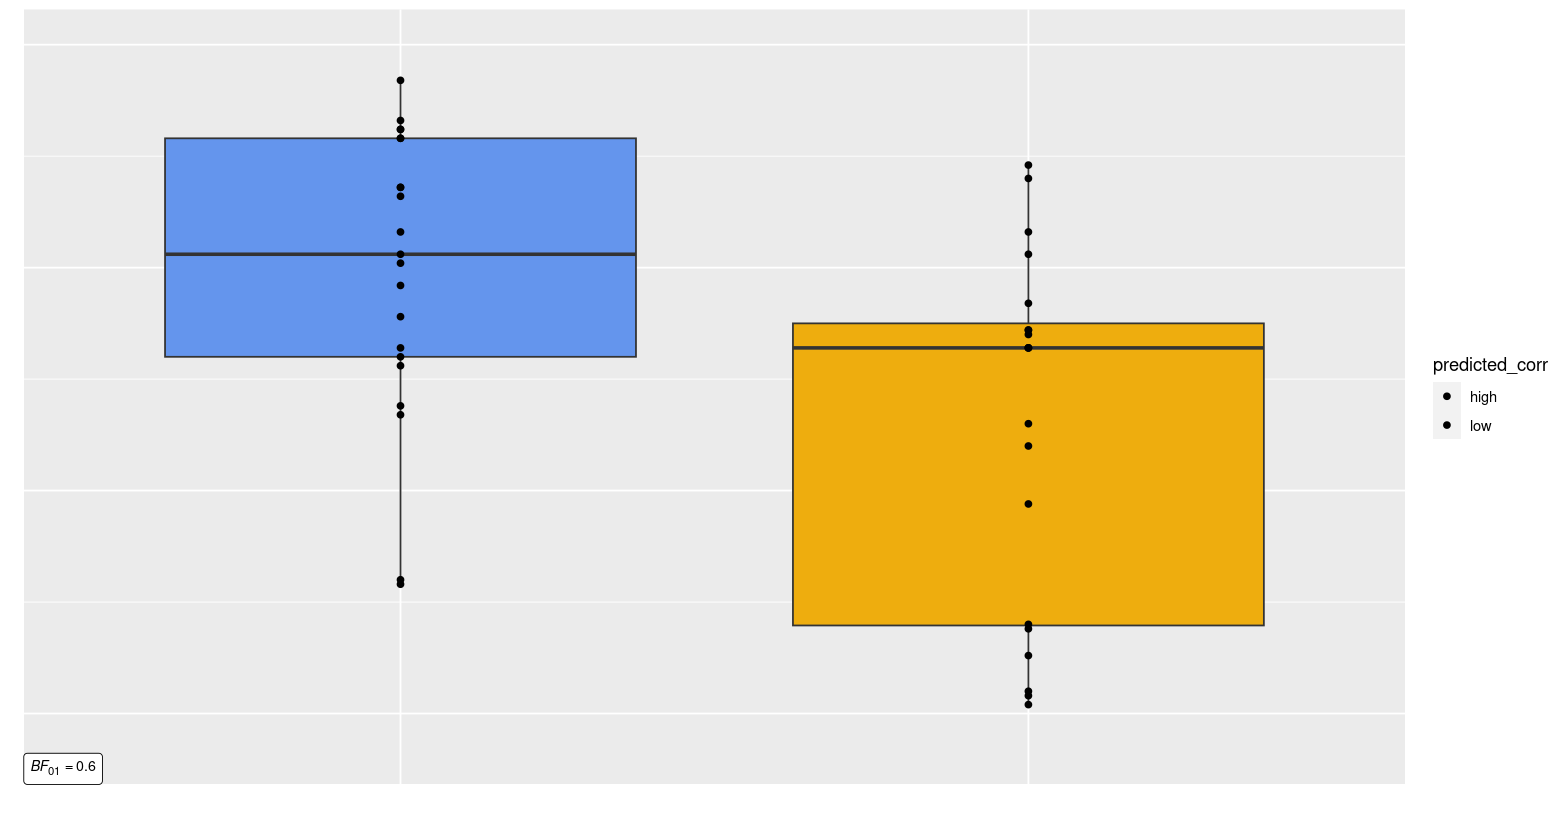

In [125]:
ggplot() + 
    geom_boxplot(data = filter(corr_df.Lateralization, variable=='GFP'), aes(x=predicted_corr, y=value, fill=predicted_corr), show.legend = FALSE, alpha=1) + 
    geom_point(data = filter(corr_df.Lateralization, variable=='GFP'), color='black', aes(x=predicted_corr, y=value, fill=predicted_corr)) +
    scale_fill_manual( values = c("cornflowerblue", "darkgoldenrod2")) +
    # scale_color_manual( values = c("cornflowerblue", "darkgoldenrod2")) +
    # coord_flip() +
    theme(
        axis.title.y=element_text(colour = "white"),
        axis.text.y=element_text(colour = "white"),
        axis.ticks.y=element_line(colour = "white"),
          axis.title.x=element_text(colour = "white"),
        axis.text.x=element_text(colour = "white"),
        axis.ticks.x=element_line(colour = "white"),
        plot.margin=unit(c(0.2,0,0.2,-0.2), "cm")
    ) +
    labs(y=NULL) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_[1])), 1),"</p>", sep=""), size=3) +
    ylim(ymin_, 1)

TableGrob (3 x 3) "arrange": 9 grobs
  z     cells    name                 grob
1 1 (1-1,1-1) arrange       gtable[layout]
2 2 (1-1,2-2) arrange       gtable[layout]
3 3 (1-1,3-3) arrange       gtable[layout]
4 4 (2-2,1-1) arrange rect[GRID.rect.2274]
5 5 (2-2,2-2) arrange rect[GRID.rect.2274]
6 6 (2-2,3-3) arrange       gtable[layout]
7 7 (3-3,1-1) arrange rect[GRID.rect.2274]
8 8 (3-3,2-2) arrange rect[GRID.rect.2274]
9 9 (3-3,3-3) arrange       gtable[layout]

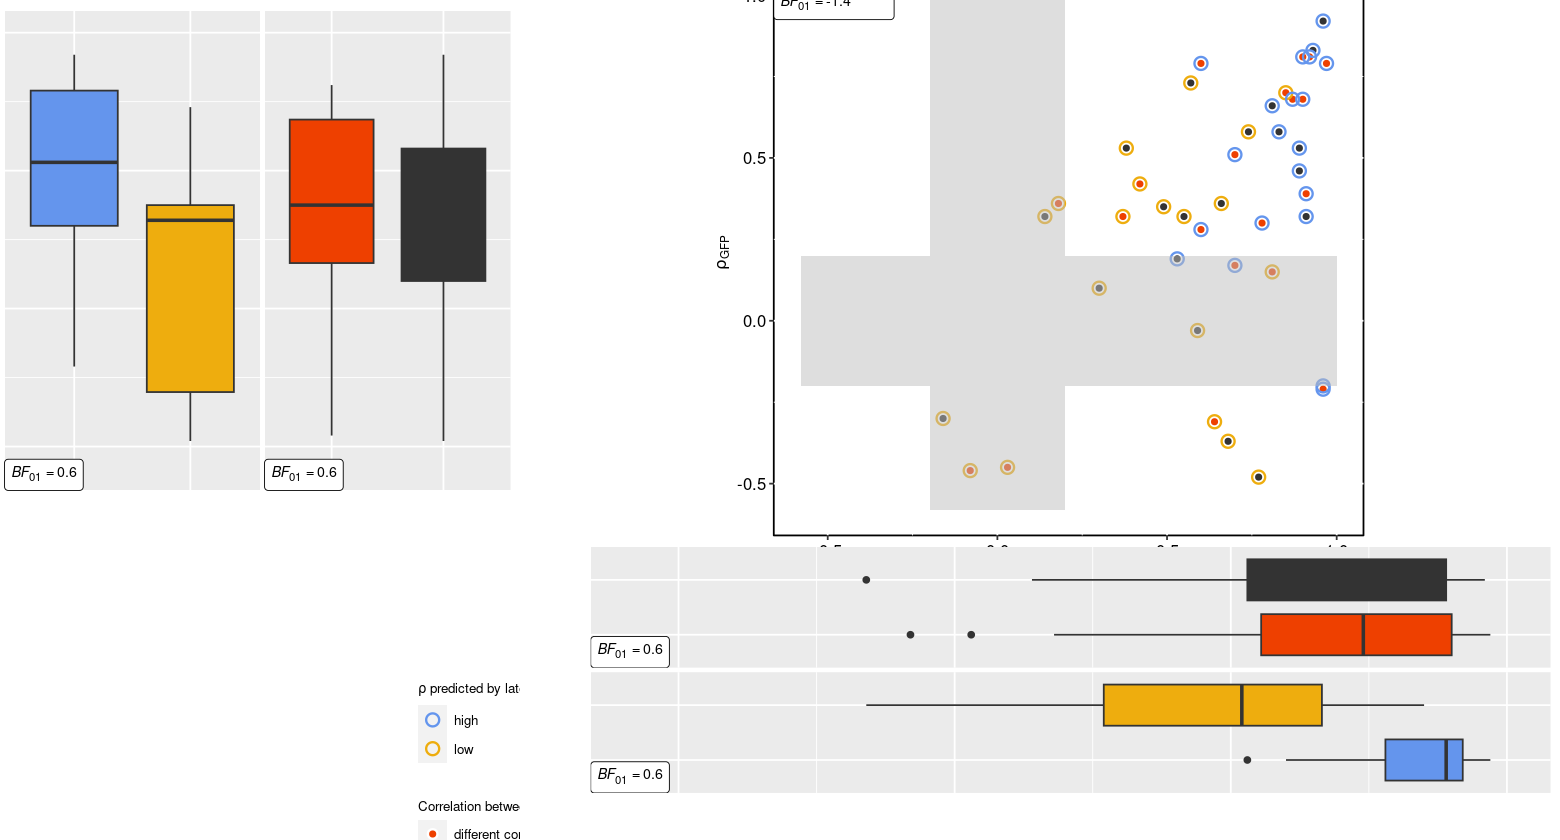

In [378]:
xmin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1
ymin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1



scatter_plot <- ggplot(NULL, aes_string(x=paste(r_1, collapse='_'), y=paste(r_2, collapse='_'))) + 
    geom_point(data = corr_df, aes(fill=con), colour="white", shape=21, size=2, stroke=1) +
    geom_point(data = corr_df, aes(colour=predicted_corr), shape=1, size=3, stroke=1, alpha=1) +
    # geom_point(data = corr_df_high <- filter(corr_df, predicted_corr == 'low'), aes(fill=predicted_corr), colour="green", shape=1, size=4, stroke=0.7) 
    scale_fill_manual(
        name = "Correlation between",
        labels = c("different conditions", "same conditions"),
        values=c("orangered2", "gray20")
        ) + 
    scale_colour_manual(
        name = bquote(rho~"predicted by lateralization"),
        labels = c(bquote("high"), bquote("low")),
        values=c("cornflowerblue", "darkgoldenrod2")) +
    # geom_point(data = corr_df, aes(colour=con), shape=19, size=2) +
    xlim(xmin_, 1) +
    ylim(ymin_, 1) +

    annotate("rect", xmin=xmin_, xmax=-rho_thr, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", xmin=rho_thr, xmax=1, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=ymin_, ymax=-rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=rho_thr, ymax=1, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=-rho_thr, ymax=rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +

    annotate("richtext", x=-Inf, y=Inf, hjust=0, vjust=1, label = paste(
        "<p style='margin=5px'>\u03c1<sub>MT+ - GFP</sub> = ", round(cor_rho, 2), "</p>", 
        "<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(1/extractBF(cor_bf)$bf)), 1), "</p>", sep=""), size=3) +

    coord_cartesian(xlim = c(xmin_, 1), # This focuses the x-axis on the range of interest
                      clip = 'off') +
    theme(
        aspect.ratio = 0.96,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=10),
        axis.text.y = element_text(color="black", 
                           size=10, angle=0),
        axis.title=element_text(size=10, face="bold"),
        legend.title=element_text(size=8),
        legend.text=element_text(size=8),
        plot.margin=unit(c(0.2-0.85, 0.2, 0.2, 0.2), "cm")
        ) + 
    xlab(bquote(rho[MT*'+'])) +
    ylab(bquote(rho[GFP])) +
    theme(legend.position = c(-0.47, -0.43))



# hist_top <- ggplot()+geom_density(data = corr_df, aes(fill=con))
# corr_df_long <- gather(corr_df, roi, value, GFP:fMotionArea, factor_key=TRUE)


hist_lat_gfp <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Lateralization, variable=='GFP'), aes(x=predicted_corr, y=value, fill=predicted_corr), show.legend = FALSE, alpha=1) + 
    scale_fill_manual( values = c("cornflowerblue", "darkgoldenrod2")) +
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(0.23, 0, 2, 0), "cm")
    ) +
    labs(y=NULL) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_[1])), 1),"</p>", sep=""), size=3) +
    ylim(ymin_, 1)


hist_con_gfp <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Condition, variable=='GFP'), aes(x=con, y=value, fill=con), show.legend = FALSE, alpha=1) + 
    scale_fill_manual( values = c("orangered2", "gray20")) +
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(0.23, 0.2, 2, 0), "cm")
    ) +
    labs(y=NULL) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_[1])), 1),"</p>", sep=""), size=3) +
    ylim(ymin_, 1)



    

hist_con_mt <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Condition, variable=='fMotionArea'), aes(x=value, y=con, fill=con), show.legend = FALSE, alpha=1) +
    scale_fill_manual( values = c("orangered2", "gray20")) + 
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(-0.9, 0.2, 0.9, 1.4), "cm")
    ) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_[1])), 1),"</p>", sep=""), size=3) + 
    xlim(ymin_, 1)

hist_lat_mt <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Lateralization, variable=='fMotionArea'), aes(x=value, y=predicted_corr, fill=predicted_corr), show.legend = FALSE, alpha=1) +
    scale_fill_manual( values = c("cornflowerblue", "darkgoldenrod2")) + 
    # scale_x_continuous(position = "top") + 
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(-0.9, 0.2, 0.9, 1.4), "cm")
    ) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_[1])), 1),"</p>", sep=""), size=3) + 
    xlim(ymin_, 1)





# blank <- grid.rect(gp=gpar(col="white", alpha=0))

comp <- grid.arrange(hist_lat_gfp, hist_con_gfp, scatter_plot, 
             blank, blank, hist_con_mt,
             blank, blank, hist_lat_mt,
             ncol=3, nrow=3, widths=c(1, 1, 4), heights=c(4, 0.85, 0.85))

comp

ggsave(
    paste(out_path, 'comp.pdf', sep='/'),
    comp,
    scale = 0.8,
    width = 15,
    height = 15,
    units = "cm",
    # dpi = 300
    device=cairo_pdf
)


In [382]:
paste(r_1, collapse='_')

[1] "fMotionArea"

Independent-candidate M-H acceptance rate: 75%

Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling



[1] 0


Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling



[1] 0.2


Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling



[1] 4.6


Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling



[1] 5.1


TableGrob (3 x 3) "arrange": 9 grobs
  z     cells    name                 grob
1 1 (1-1,1-1) arrange       gtable[layout]
2 2 (1-1,2-2) arrange       gtable[layout]
3 3 (1-1,3-3) arrange       gtable[layout]
4 4 (2-2,1-1) arrange rect[GRID.rect.2274]
5 5 (2-2,2-2) arrange rect[GRID.rect.2274]
6 6 (2-2,3-3) arrange       gtable[layout]
7 7 (3-3,1-1) arrange rect[GRID.rect.2274]
8 8 (3-3,2-2) arrange rect[GRID.rect.2274]
9 9 (3-3,3-3) arrange       gtable[layout]

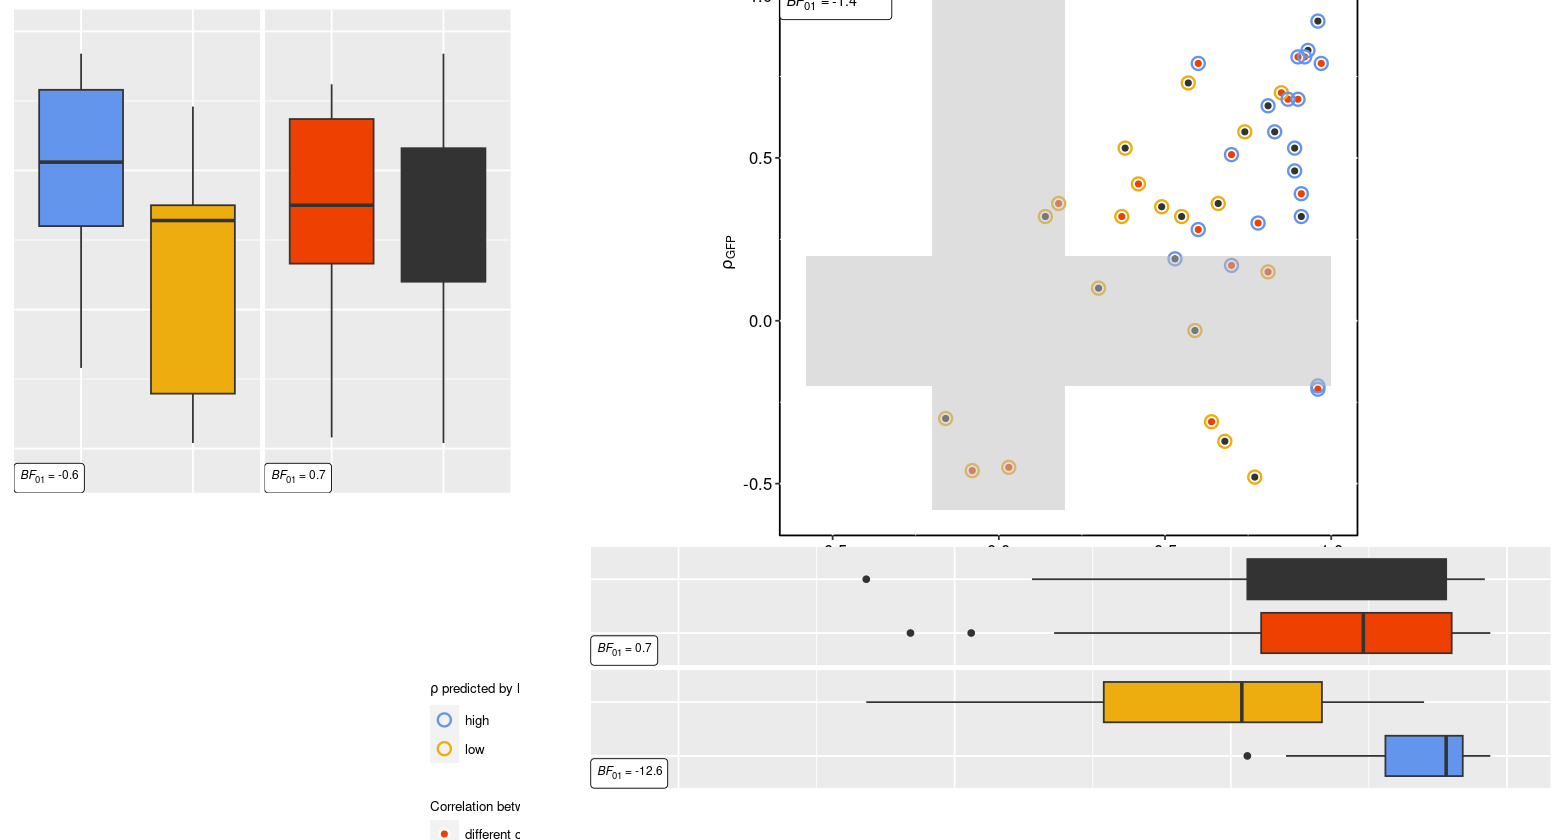

In [428]:
base_path <- "/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/gaze-motion"
out_path <- file.path(base_path, 'results/pilot/hrf_correlations/group_level/MT-GFP2')


complx_model_thr <- 6

# out_path <- '/home/marius/ownCloud/PhD/projects/scientific/gaze-motion/'
# out_path <- '/Users/mariusgorner/ownCloud/PhD/projects/scientific/gaze-motion/results/from_nideconv/correlations_group_analysis/new_version'

dir.create(file.path(out_path), showWarnings = FALSE)

rho_thr = max(abs(filter(comparison_df, bf < 10)$rho))

cor_bf <- correlationBF(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')])
samples <- correlationBF(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')],
          posterior = TRUE, iterations = 10000)
cor_rho <- mean(samples[,"rho"])

clab1_ <- "rho = "
clab2_ <- ", BF[10] = "
cor_label <- bquote(atop(rho[.(paste(r_1, collapse='_'))-.(paste(r_2, collapse='_'))]==.(round(cor_rho, 2)), italic(BF)[10]==.(round(extractBF(cor_bf)$bf, 1))))#bquote(atop(rho[fMA-GFP]==.(round(cor_rho, 2))~"a"), col="red", cex = 1.4)

xmin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1
ymin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1



####################
### SCATTER PLOT ###
####################

scatter_plot <- ggplot(NULL, aes_string(x=paste(r_1, collapse='_'), y=paste(r_2, collapse='_'))) + 
    geom_point(data = corr_df, aes(fill=con), colour="white", shape=21, size=2, stroke=1) +
    geom_point(data = corr_df, aes(colour=predicted_corr), shape=1, size=3, stroke=1, alpha=1) +
    # geom_point(data = corr_df_high <- filter(corr_df, predicted_corr == 'low'), aes(fill=predicted_corr), colour="green", shape=1, size=4, stroke=0.7) +
    scale_fill_manual(
        name = "Correlation between",
        labels = c("different conditions", "same conditions"),
        values=c("orangered2", "gray20")
        ) +
    scale_colour_manual(
        name = bquote(rho~"predicted by lateralization"),
        labels = c(bquote("high"), bquote("low")),
        values=c("cornflowerblue", "darkgoldenrod2")) +
    # geom_point(data = corr_df, aes(colour=con), shape=19, size=2) +
    # xlim(xmin_, 1) +
    ylim(ymin_, 1) +

    annotate("rect", xmin=xmin_, xmax=-rho_thr, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", xmin=rho_thr, xmax=1, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=ymin_, ymax=-rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=rho_thr, ymax=1, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=-rho_thr, ymax=rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +

    annotate("richtext", x=-Inf, y=Inf, hjust=0, vjust=1, label = paste(
        "<p style='margin=5px'>\u03c1<sub>MT+ - GFP</sub> = ", round(cor_rho, 2), "</p>", 
        "<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(1/extractBF(cor_bf)$bf)), 1), "</p>", sep=""), size=3) +

    coord_cartesian(xlim = c(xmin_, 1), # This focuses the x-axis on the range of interest
                      clip = 'off') +
    theme(
        # aspect.ratio = 1,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=8, angle=0),
        axis.text.y = element_text(color="black", 
                           size=8, angle=0),
        axis.title=element_text(size=8),
        legend.title=element_text(size=8),
        legend.text=element_text(size=8)
        ) + 
    xlab(bquote(rho[MT*'+'])) +
    ylab(bquote(rho[GFP])) +
    coord_fixed()

ggsave(
    paste(out_path, 'scatter_plot.pdf', sep='/'),
    scatter_plot,
    scale = 1,
    width = 15,
    height = 15,
    units = "cm",
    # dpi = 100,
    device = cairo_pdf
)







##################################
##################################
##################################
### lateralization


corr_df.Lateralization <- melt(corr_df, id.vars=c('predicted_corr','participant'), measure.vars=c(paste(r_1, collapse='_'), paste(r_2, collapse='_')))

box_lateralization <- ggplot(corr_df.Lateralization, aes(x=variable, y=value, fill=predicted_corr)) + 
    geom_boxplot(color='black', show.legend = FALSE) + 
    annotate("rect", xmin=0.5, xmax=2.5, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    theme(
        panel.background = element_rect(fill='white', colour='black')) + 
    scale_fill_manual(labels = c("high", "low"), values=c("cornflowerblue", "darkgoldenrod2")) + 
    scale_x_discrete(labels= c('MT+', 'GFP')) +
    xlab("ROI") + 
    ylab(expression(rho)) + 
    xlab("") +
    # labs("")+#fill = bquote(rho~"predicted by lateralization"), size=1)+
    theme(
        # aspect.ratio = 0.8,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=8, angle=0),
        axis.text.y = element_text(color="black", 
                           size=8, angle=0),
        axis.title=element_text(size=8)
        )




### modelling 
bfs_lat <- c()
for (roi_ in c(paste(r_1, collapse='_'), paste(r_2, collapse='_'))) {

    
    ### SPECIFICATION OF MODEL AND PRIOR
#     mf_ <- bf(
#         value ~ predicted_corr# + (predicted_corr | participant)
#     )
#     get_prior(mf_,  data = corr_df.Lateralization)

#     ## 
#     priors_ = c(
#         set_prior('normal(0, 10)', class='b', lb=-2, ub=2)
#     )

    
#     mf_ <- bf(
#     value | trunc(lb=-1, ub=1) ~ predicted_corr# + (predicted_corr | participant)
#     )
#     get_prior(mf_,  data = corr_df.Lateralization)


#     ## truncated priors:  effect only
#     priors_ = c(
#         set_prior('normal(0, 1)', class='Intercept', lb=-1, ub=1),
#         set_prior('lognormal(0.5, 0.5)', class='sigma'),
#         set_prior('normal(0, 2)', class='b')
#     )

    
    
    if (length(unique(corr_df.Lateralization$participant))<complx_model_thr) {
        mf_ <- bf(
        value | trunc(lb=-1, ub=1) ~ predicted_corr,
        family='gaussian'
        )

        ## truncated priors:  effect only
        priors_ = c(
            set_prior('normal(0, 1)', class='Intercept'),
            set_prior('normal(0, 2)', class='b'),
            set_prior('lognormal(0, 0.5)', class='sigma')
        )
    } else {
    
        mf_ <- bf(
            value | trunc(lb=-1, ub=1) ~ predicted_corr + (predicted_corr || participant),
            family='gaussian'
            )

        priors_ = c(
            set_prior('normal(0, 1)', class='Intercept'),
            set_prior('normal(0, 2)', class='b'),   
            set_prior('normal(1, .5)', class='sd', coef='Intercept', group='participant'),
            set_prior('normal(1, .5)', class='sd', coef='predicted_corrlow', group='participant'), 
            set_prior('lognormal(0, 0.5)', class='sigma')
        )
    
    }


   
    
    
    # FIT MODEL for prior predicitve check
    capture.output({
        m = brm(
            mf_, 
            data = filter(corr_df.Lateralization, variable==roi_), 
            prior = priors_,
            sample_prior = 'only', 
            family = gaussian(link="identity"),
            chains = 4,
            # iter = 1,
            cores = 4,
            save_pars = save_pars(all=TRUE),
            control = list(adapt_delta = 0.9, max_treedepth = 20))
        }, 
    file="rstan.modelfit.output")
    
    # prior predicitive check    
    plted_ <- FALSE
    while (!plted_){
        succ_ <- try(pp_ <- pp_check(m, ndraws=50))
        plted_ <- !any(grepl( 'Error', succ_, fixed = TRUE))
    }
    file_type = "_prior_predictive_check.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 15, # The width of the plot in inches
        height = 10
        )
    
    plot(pp_)
    dev.off()

    
    
    # FIT MODEL
    capture.output({
        m = brm(
            mf_, 
            data = filter(corr_df.Lateralization, variable==roi_), 
            prior = priors_,
            sample_prior = TRUE, 
            family = gaussian(link="identity"),
            chains = 4,
            # iter = 1,
            cores = 4,
            save_pars = save_pars(all=TRUE),
            control = list(adapt_delta = 0.9, max_treedepth = 20))
        }, 
    file="rstan.modelfit.output")

    # posterior predicitive check
    plted_ <- FALSE
    while (!plted_){
        succ_ <- try(pp_ <- pp_check(m, ndraws=50))
        plted_ <- !any(grepl( 'Error', succ_, fixed = TRUE))
    }

    file_type = "_posterior_predictive_check.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 15, # The width of the plot in inches
        height = 10
        )
    
    plot(pp_)
    dev.off()

    
    file_type = "_summary.txt"
    s <- summary(m)
    capture.output(s, file=file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )

    file_type = "_conditional-effects.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 3, # The width of the plot in inches
        height = 3
        )
    plot(conditional_effects(m, robust = TRUE), points = TRUE, point_args=c(size=0.5,width=0.1), ask = FALSE, ylim=c(3,-3))
    dev.off()


    file_type = "_posterior_draws.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 4, # The width of the plot in inches
        height = 3
        )
    print(m %>%
        gather_draws(!!sym(paste0(get_variables(m)[1])), !!sym(paste0(get_variables(m)[2]))) %>%
        mutate() %>%
        ggplot(aes(x = .variable, y = .value)) +
        stat_halfeye(size=0.01))
    dev.off()


    hyp <- 'predicted_corrlow = 0'
    hyp <- hypothesis(m, hyp)
    file_type = "_hypothesis-test_BF.txt"
    capture.output(hyp[1], file=file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )

    bfs_lat <- append(bfs_lat, format(hyp[1]$hypothesis$Evid.Ratio, digits=2, nsmall=2))
    print(round(hyp[1]$hypothesis$Evid.Ratio, 1))
    
    file_type = "_posterior-probability.txt"
    pp_ = colMeans(hyp$samples > 0)
    capture.output(pp_, file=file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )


    file_type = "_hypothesis-test_prior-posterior.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 4, # The width of the plot in inches
        height = 3
        )
    plot(hyp, chars = NULL)
    dev.off()

    #
    file_type = "_pairs.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('lateralization', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 15, # The width of the plot in inches
        height = 10
        )
    plot(pairs(m))
    dev.off()
    
}


box_lateralization <- box_lateralization +
    annotate("richtext", x=-Inf, y=-Inf, hjust=0, vjust=0, label = paste("<p style='margin=5px'><i>BF</i><sub>01,MT+</sub> = ", round(log10(as.numeric(bfs_lat[1])), 1), "</p>", 
                                                          "<p><i>BF</i><sub>01,GFP</sub> = ", round(log10(as.numeric(bfs_lat[2])), 1),"</p>", sep=""), size=3) +
    coord_cartesian(xlim = c(1, 2), clip = 'off')

ggsave(
    paste(out_path, 'lateralization_boxplot.pdf', sep='/'),
    box_lateralization,
    scale = 1,
    width = 7.5,
    height = 7.5,
    units = "cm",
    # dpi = 300
    device=cairo_pdf
)







##################################
##################################
##################################
### condition

xmin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1
ymin_ = min(c(corr_df[, paste(r_1, collapse='_')], corr_df[, paste(r_2, collapse='_')]))-0.1


corr_df.Condition <- melt(corr_df, id.vars=c('con', 'participant'), measure.vars=c(paste(r_1, collapse='_'), paste(r_2, collapse='_')))

box_condition <- ggplot(corr_df.Condition, aes(x=variable, y=value, fill=con)) + 
    geom_boxplot(color='black', show.legend=FALSE) + 
    annotate("rect", xmin=0.5, xmax=2.5, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    theme(
        panel.background = element_rect(fill='white', colour='black')) + 
    scale_fill_manual(labels = c("different conditions", "same conditions"), values=c("orangered2", "gray20")) + 
    scale_x_discrete(labels= c('MT+', 'GFP')) +
    xlab("ROI") + 
    ylab(expression(rho)) + 
    labs(fill = "Correlation between:") +
    xlab("") +
    theme(
        # aspect.ratio = 0.8,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=8, angle=0),
        axis.text.y = element_text(color="black", 
                           size=8, angle=0),
        axis.title=element_text(size=8)
        )



### modelling 
bfs_con <- c()
for (roi_ in c(paste(r_1, collapse='_'), paste(r_2, collapse='_'))) {

#     mf_ <- bf(
#         value ~ con# + (con | participant)
#     )
#     get_prior(mf_,  data = corr_df.Condition)

#     ## truncated priors:  effect only
#     priors_ = c(
#         set_prior('normal(0, 10)', class='b', lb=-2, ub=2)
#     )
    
    
#     mf_ <- bf(
#     value | trunc(lb=-1, ub=1) ~ con# + (con | participant)
#     )
#     get_prior(mf_,  data = corr_df.Condition)


#     ## truncated priors:  effect only
#     priors_ = c(
#         set_prior('normal(0, 1)', class='Intercept', lb=-1, ub=1),
#         set_prior('lognormal(0.5, 0.5)', class='sigma'),
#         set_prior('normal(0, 2)', class='b')
#     )
    
    if (length(unique(corr_df.Lateralization$participant))<complx_model_thr) {
        mf_ <- bf(
        value | trunc(lb=-1, ub=1) ~ con,
        family='gaussian'
        )

        ## truncated priors:  effect only
        priors_ = c(
            set_prior('normal(0, 1)', class='Intercept'),
            set_prior('normal(0, 2)', class='b'),
            set_prior('lognormal(0, 0.5)', class='sigma')
        )
    } else {
    
        mf_ <- bf(
            value | trunc(lb=-1, ub=1) ~ con + (con || participant),
            family='gaussian'
            )

        priors_ = c(
            set_prior('normal(0, 1)', class='Intercept'),
            set_prior('normal(0, 2)', class='b'),   
            set_prior('normal(1, .5)', class='sd', coef='Intercept', group='participant'),
            set_prior('normal(1, .5)', class='sd', coef='consame', group='participant'),
            set_prior('lognormal(0, 0.5)', class='sigma')
        )
    
    }


    
    # FIT MODEL for prior predicitve check
    capture.output({
        m = brm(
            mf_, 
            data = filter(corr_df.Condition, variable==roi_), 
            prior = priors_,
            sample_prior = 'only', 
            family = gaussian(link="identity"),
            chains = 4,
            # iter = 1,
            cores = 4,
            save_pars = save_pars(all=TRUE),
            control = list(adapt_delta = 0.9, max_treedepth = 20))
        }, 
    file="rstan.modelfit.output")
    
    # prior predicitive check
    plted_ <- FALSE
    while (!plted_){
        succ_ <- try(pp_ <- pp_check(m, ndraws=50))
        plted_ <- !any(grepl( 'Error', succ_, fixed = TRUE))
    }

    file_type = "_prior_predictive_check.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 15, # The width of the plot in inches
        height = 10
        )
    
    plot(pp_)
    dev.off()

    
    
    #
    capture.output({
        m = brm(
            mf_, 
            data = filter(corr_df.Condition, variable==roi_), 
            prior = priors_,
            sample_prior = TRUE, 
            family = gaussian(link="identity"),
            chains = 4,
            # iter = 1,
            cores = 4,
            save_pars = save_pars(all=TRUE),
            control = list(adapt_delta = 0.9, max_treedepth = 20))
        }, 
    file="rstan.modelfit.output")

    
    # posterior predicitive check
    plted_ <- FALSE
    while (!plted_){
        succ_ <- try(pp_ <- pp_check(m, ndraws=50))
        plted_ <- !any(grepl( 'Error', succ_, fixed = TRUE))
    }
    file_type = "_posterior_predictive_check.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 15, # The width of the plot in inches
        height = 10
        )
    
    plot(pp_)
    dev.off()

    
    file_type = "_summary.txt"
    s <- summary(m)
    capture.output(s, file=file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )

    file_type = "_conditional-effects.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 3, # The width of the plot in inches
        height = 3
        )
    
    plot(conditional_effects(m, robust = TRUE), points = TRUE, point_args=c(size=0.5,width=0.1), ask = FALSE, ylim=c(3,-3))
    dev.off()


    file_type = "_posterior_draws.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 4, # The width of the plot in inches
        height = 3
        )
    print(m %>%
        gather_draws(!!sym(paste0(get_variables(m)[1])), !!sym(paste0(get_variables(m)[2]))) %>%
        mutate() %>%
        ggplot(aes(x = .variable, y = .value)) +
        stat_halfeye(size=0.01))
    dev.off()


    hyp <- 'consame = 0'
    hyp <- hypothesis(m, hyp)
    file_type = "_hypothesis-test_BF.txt"
    capture.output(hyp[1], file=file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )
    bfs_con <- append(bfs_con, format(hyp[1]$hypothesis$Evid.Ratio, digits=2, nsmall=2))
    print(round(hyp[1]$hypothesis$Evid.Ratio, 1))

                   
    file_type = "_posterior-probability.txt"
    pp_ = colMeans(hyp$samples > 0)
    capture.output(pp_, file=file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                   )
                )


    file_type = "_hypothesis-test_prior-posterior.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 4, # The width of the plot in inches
        height = 3
        )
    plot(hyp, chars = NULL)
    dev.off()

    #
    file_type = "_pairs.pdf"
    pdf(file.path(out_path, 
                      paste(
                        paste(paste('condition', roi_, sep='_'), 
                        file_type, sep = "")
                      )
                  ),
        width = 15, # The width of the plot in inches
        height = 10
        )
    plot(pairs(m))
    dev.off()
}
    

box_condition <- box_condition +
    annotate("richtext", x=-Inf, y=-Inf, hjust=0, vjust=0, label = paste("<p style='margin=5px'><i>BF</i><sub>01,MT+</sub> = ", round(log10(as.numeric(bfs_con[1])), 1), "</p>", 
                                                          "<p><i>BF</i><sub>01,GFP</sub> = ", round(log10(as.numeric(bfs_con[2])), 1),"</p>", sep=""), size=3) +
    coord_cartesian(xlim = c(1, 2), clip = 'off')

ggsave(
    paste(out_path, 'condition_boxplot.pdf', sep='/'),
    box_condition,
    scale = 1,
    width = 7.5,
    height = 7.5,
    units = "cm",
    # dpi = 300
    device = cairo_pdf
)

# p1 <- ggarrange(  
#     ggarrange(box_lateralization, box_condition, ncol = 2, labels = c("A", "B")),
#     ggarrange(scatter_plot, ncol = 1, labels = c("C")),
#     heights = c(1.2, 2),
#     nrow = 2                                       
# ) 

# ggsave(
#     paste(out_path, 'combined.pdf', sep='/'),
#     p1,
#     scale = 1,
#     width = 12,
#     height = 12,
#     units = "cm",
#     # dpi = 300
#     device = cairo_pdf
# )




#### make combination plot

scatter_plot <- ggplot(NULL, aes_string(x=paste(r_1, collapse='_'), y=paste(r_2, collapse='_'))) + 
    geom_point(data = corr_df, aes(fill=con), colour="white", shape=21, size=2, stroke=1) +
    geom_point(data = corr_df, aes(colour=predicted_corr), shape=1, size=3, stroke=1, alpha=1) +
    # geom_point(data = corr_df_high <- filter(corr_df, predicted_corr == 'low'), aes(fill=predicted_corr), colour="green", shape=1, size=4, stroke=0.7) 
    scale_fill_manual(
        name = "Correlation between",
        labels = c("different conditions", "same conditions"),
        values=c("orangered2", "gray20")
        ) + 
    scale_colour_manual(
        name = bquote(rho~"predicted by lateralization"),
        labels = c(bquote("high"), bquote("low")),
        values=c("cornflowerblue", "darkgoldenrod2")) +
    # geom_point(data = corr_df, aes(colour=con), shape=19, size=2) +
    xlim(xmin_, 1) +
    ylim(ymin_, 1) +

    annotate("rect", xmin=xmin_, xmax=-rho_thr, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", xmin=rho_thr, xmax=1, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=ymin_, ymax=-rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=rho_thr, ymax=1, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=-rho_thr, ymax=rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +

    annotate("richtext", x=-Inf, y=Inf, hjust=0, vjust=1, label = paste(
        "<p style='margin=5px'>\u03c1<sub>MT+ - GFP</sub> = ", round(cor_rho, 2), "</p>", 
        "<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(1/extractBF(cor_bf)$bf)), 1), "</p>", sep=""), size=3) +

    coord_cartesian(xlim = c(xmin_, 1), # This focuses the x-axis on the range of interest
                      clip = 'off') +
    theme(
        aspect.ratio = 0.98,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=10),
        axis.text.y = element_text(color="black", 
                           size=10, angle=0),
        axis.title=element_text(size=10, face="bold"),
        legend.title=element_text(size=8),
        legend.text=element_text(size=8),
        plot.margin=unit(c(0.2-0.85, 0.2, 0.2, 0.2), "cm")
        ) + 
    xlab(bquote(rho[MT*'+'])) +
    ylab(bquote(rho[GFP])) +
    theme(legend.position = c(-0.47, -0.43))



# hist_top <- ggplot()+geom_density(data = corr_df, aes(fill=con))
# corr_df_long <- gather(corr_df, roi, value, GFP:fMotionArea, factor_key=TRUE)


hist_lat_gfp <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Lateralization, variable=='GFP'), aes(x=predicted_corr, y=value, fill=predicted_corr), show.legend = FALSE, alpha=1) + 
    scale_fill_manual( values = c("cornflowerblue", "darkgoldenrod2")) +
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(0.2, 0, 1.95, 0.2), "cm")
    ) +
    labs(y=NULL) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_lat[2])), 1),"</p>", sep=""), size=2.5) +
    ylim(ymin_, 1)


hist_con_gfp <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Condition, variable=='GFP'), aes(x=con, y=value, fill=con), show.legend = FALSE, alpha=1) + 
    scale_fill_manual( values = c("orangered2", "gray20")) +
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(0.2, 0.2, 1.95, 0), "cm")
    ) +
    labs(y=NULL) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_con[2])), 1),"</p>", sep=""), size=2.5) +
    ylim(ymin_, 1)



    

hist_con_mt <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Condition, variable=='fMotionArea'), aes(x=value, y=con, fill=con), show.legend = FALSE, alpha=1) +
    scale_fill_manual( values = c("orangered2", "gray20")) + 
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(-0.9, 0.2, 0.95, 1.4), "cm")
    ) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_con[1])), 1),"</p>", sep=""), size=2.5) + 
    xlim(ymin_, 1)

hist_lat_mt <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Lateralization, variable=='fMotionArea'), aes(x=value, y=predicted_corr, fill=predicted_corr), show.legend = FALSE, alpha=1) +
    scale_fill_manual( values = c("cornflowerblue", "darkgoldenrod2")) + 
    # scale_x_continuous(position = "top") + 
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(-0.95, 0.2, 1, 1.4), "cm")
    ) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_lat[1])), 1),"</p>", sep=""), size=2.5) + 
    xlim(ymin_, 1)





# blank <- grid.rect(gp=gpar(col="white", alpha=0))

comp <- grid.arrange(hist_lat_gfp, hist_con_gfp, scatter_plot, 
             blank, blank, hist_con_mt,
             blank, blank, hist_lat_mt,
             ncol=3, nrow=3, widths=c(1, 1, 4), heights=c(4, 0.85, 0.85))

comp

ggsave(
    paste(out_path, 'combined.pdf', sep='/'),
    comp,
    scale = 0.8,
    width = 15,
    height = 15,
    units = "cm",
    # dpi = 300
    device=cairo_pdf
)


In [427]:
scatter_plot <- ggplot(NULL, aes_string(x=paste(r_1, collapse='_'), y=paste(r_2, collapse='_'))) + 
    geom_point(data = corr_df, aes(fill=con), colour="white", shape=21, size=2, stroke=1) +
    geom_point(data = corr_df, aes(colour=predicted_corr), shape=1, size=3, stroke=1, alpha=1) +
    # geom_point(data = corr_df_high <- filter(corr_df, predicted_corr == 'low'), aes(fill=predicted_corr), colour="green", shape=1, size=4, stroke=0.7) 
    scale_fill_manual(
        name = "Correlation between",
        labels = c("different conditions", "same conditions"),
        values=c("orangered2", "gray20")
        ) + 
    scale_colour_manual(
        name = bquote(rho~"predicted by lateralization"),
        labels = c(bquote("high"), bquote("low")),
        values=c("cornflowerblue", "darkgoldenrod2")) +
    # geom_point(data = corr_df, aes(colour=con), shape=19, size=2) +
    xlim(xmin_, 1) +
    ylim(ymin_, 1) +

    annotate("rect", xmin=xmin_, xmax=-rho_thr, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", xmin=rho_thr, xmax=1, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=ymin_, ymax=-rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=rho_thr, ymax=1, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +
    annotate("rect", ymin=-rho_thr, ymax=rho_thr, xmin=-rho_thr, xmax=rho_thr, alpha=0.5, fill='grey') +

    annotate("richtext", x=-Inf, y=Inf, hjust=0, vjust=1, label = paste(
        "<p style='margin=5px'>\u03c1<sub>MT+ - GFP</sub> = ", round(cor_rho, 2), "</p>", 
        "<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(1/extractBF(cor_bf)$bf)), 1), "</p>", sep=""), size=3) +

    coord_cartesian(xlim = c(xmin_, 1), # This focuses the x-axis on the range of interest
                      clip = 'off') +
    theme(
        aspect.ratio = 0.98,
        panel.background = element_rect(fill='white', colour='black'),
        axis.text.x = element_text(color=" black", 
                           size=10),
        axis.text.y = element_text(color="black", 
                           size=10, angle=0),
        axis.title=element_text(size=10, face="bold"),
        legend.title=element_text(size=8),
        legend.text=element_text(size=8),
        plot.margin=unit(c(0.2-0.85, 0.2, 0.2, 0.2), "cm")
        ) + 
    xlab(bquote(rho[MT*'+'])) +
    ylab(bquote(rho[GFP])) +
    theme(legend.position = c(-0.47, -0.43))



# hist_top <- ggplot()+geom_density(data = corr_df, aes(fill=con))
# corr_df_long <- gather(corr_df, roi, value, GFP:fMotionArea, factor_key=TRUE)


hist_lat_gfp <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Lateralization, variable=='GFP'), aes(x=predicted_corr, y=value, fill=predicted_corr), show.legend = FALSE, alpha=1) + 
    scale_fill_manual( values = c("cornflowerblue", "darkgoldenrod2")) +
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(0.2, 0, 1.95, 0.2), "cm")
    ) +
    labs(y=NULL) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_lat[2])), 1),"</p>", sep=""), size=2.5) +
    ylim(ymin_, 1)


hist_con_gfp <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Condition, variable=='GFP'), aes(x=con, y=value, fill=con), show.legend = FALSE, alpha=1) + 
    scale_fill_manual( values = c("orangered2", "gray20")) +
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(0.2, 0.2, 1.95, 0), "cm")
    ) +
    labs(y=NULL) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_con[2])), 1),"</p>", sep=""), size=2.5) +
    ylim(ymin_, 1)



    

hist_con_mt <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Condition, variable=='fMotionArea'), aes(x=value, y=con, fill=con), show.legend = FALSE, alpha=1) +
    scale_fill_manual( values = c("orangered2", "gray20")) + 
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(-0.9, 0.2, 0.95, 1.4), "cm")
    ) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_con[1])), 1),"</p>", sep=""), size=2.5) + 
    xlim(ymin_, 1)

hist_lat_mt <- ggplot() + 
    geom_boxplot(data = filter(corr_df.Lateralization, variable=='fMotionArea'), aes(x=value, y=predicted_corr, fill=predicted_corr), show.legend = FALSE, alpha=1) +
    scale_fill_manual( values = c("cornflowerblue", "darkgoldenrod2")) + 
    # scale_x_continuous(position = "top") + 
    theme(
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
          axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        plot.margin=unit(c(-0.95, 0.2, 1, 1.4), "cm")
    ) +
    annotate("richtext", 
             x=-Inf, y=-Inf, hjust=0, vjust=0, 
             label = paste("<p><i>BF</i><sub>01</sub> = ", round(log10(as.numeric(bfs_lat[1])), 1),"</p>", sep=""), size=2.5) + 
    xlim(ymin_, 1)





# blank <- grid.rect(gp=gpar(col="white", alpha=0))

comp <- grid.arrange(hist_lat_gfp, hist_con_gfp, scatter_plot, 
             blank, blank, hist_con_mt,
             blank, blank, hist_lat_mt,
             ncol=3, nrow=3, widths=c(1, 1, 4), heights=c(4, 0.85, 0.85))

comp

ggsave(
    paste(out_path, 'combined.pdf', sep='/'),
    comp,
    scale = 0.8,
    width = 15,
    height = 15,
    units = "cm",
    # dpi = 300
    device=cairo_pdf
)

TableGrob (3 x 3) "arrange": 9 grobs
  z     cells    name                 grob
1 1 (1-1,1-1) arrange       gtable[layout]
2 2 (1-1,2-2) arrange       gtable[layout]
3 3 (1-1,3-3) arrange       gtable[layout]
4 4 (2-2,1-1) arrange rect[GRID.rect.2274]
5 5 (2-2,2-2) arrange rect[GRID.rect.2274]
6 6 (2-2,3-3) arrange       gtable[layout]
7 7 (3-3,1-1) arrange rect[GRID.rect.2274]
8 8 (3-3,2-2) arrange rect[GRID.rect.2274]
9 9 (3-3,3-3) arrange       gtable[layout]

In [133]:
get_prior(mf_,  data = corr_df.Condition)


prior                  class     coef      group       resp dpar nlpar lb ub
1                        b                                                    
2                        b         consame                                    
3 student_t(3, 0.6, 2.5) Intercept                                            
4 student_t(3, 0, 2.5)   sd                                              0    
5                        sd                  participant                      
6                        sd        consame   participant                      
7                        sd        Intercept participant                      
8 student_t(3, 0, 2.5)   sigma                                           0    
  source 
1 default
2 default
3 default
4 default
5 default
6 default
7 default
8 default

In [86]:
mf_ <- bf(
    value | trunc(lb=-1, ub=1) ~ predicted_corr + (predicted_corr || participant),
    family='gaussian'
    )

get_prior(mf_,  data = corr_df.Lateralization)



prior                  class     coef              group       resp dpar
1                        b                                                
2                        b         predicted_corrlow                      
3 student_t(3, 0.6, 2.5) Intercept                                        
4 student_t(3, 0, 2.5)   sd                                               
5                        sd                          participant          
6                        sd        Intercept         participant          
7                        sd        predicted_corrlow participant          
8 student_t(3, 0, 2.5)   sigma                                            
  nlpar lb ub source 
1             default
2             default
3             default
4       0     default
5             default
6             default
7             default
8       0     default

In [121]:
mf_ <- bf(
    value | trunc(lb=-1, ub=1) ~ predicted_corr,
    family='gaussian'
    )

## truncated priors:  effect only
priors_ = c(
    set_prior('normal(0, 1)', class='Intercept'),
    set_prior('normal(0, 2)', class='b'),
    set_prior('lognormal(0, 0.5)', class='sigma')
)


# mf_ <- bf(
#     value | trunc(lb=-1, ub=1) ~ predicted_corr + (predicted_corr || participant),
#     family='gaussian'
#     )

# priors_ = c(
#     set_prior('normal(0, 1)', class='Intercept'),
#     set_prior('normal(0, 2)', class='b'),   
#     set_prior('normal(1, .5)', class='sd', coef='Intercept', group='participant'),
#     set_prior('normal(1, .5)', class='sd', coef='predicted_corrlow', group='participant'), 
#     set_prior('lognormal(0, 0.5)', class='sigma')
# )


# FIT MODEL for prior predicitve check
capture.output({
    m = brm(
        mf_, 
        data = filter(corr_df.Lateralization, variable==roi_), 
        prior = priors_,
        sample_prior = TRUE, 
        # sample_prior = 'only', 
        family = gaussian(link="identity"),
        chains = 4,
        cores = 4,
        save_pars = save_pars(all=TRUE),
        control = list(adapt_delta = 0.9, max_treedepth = 20))
    }, 
file="rstan.modelfit.output")

Compiling Stan program...

Start sampling



In [122]:
pairs(m)

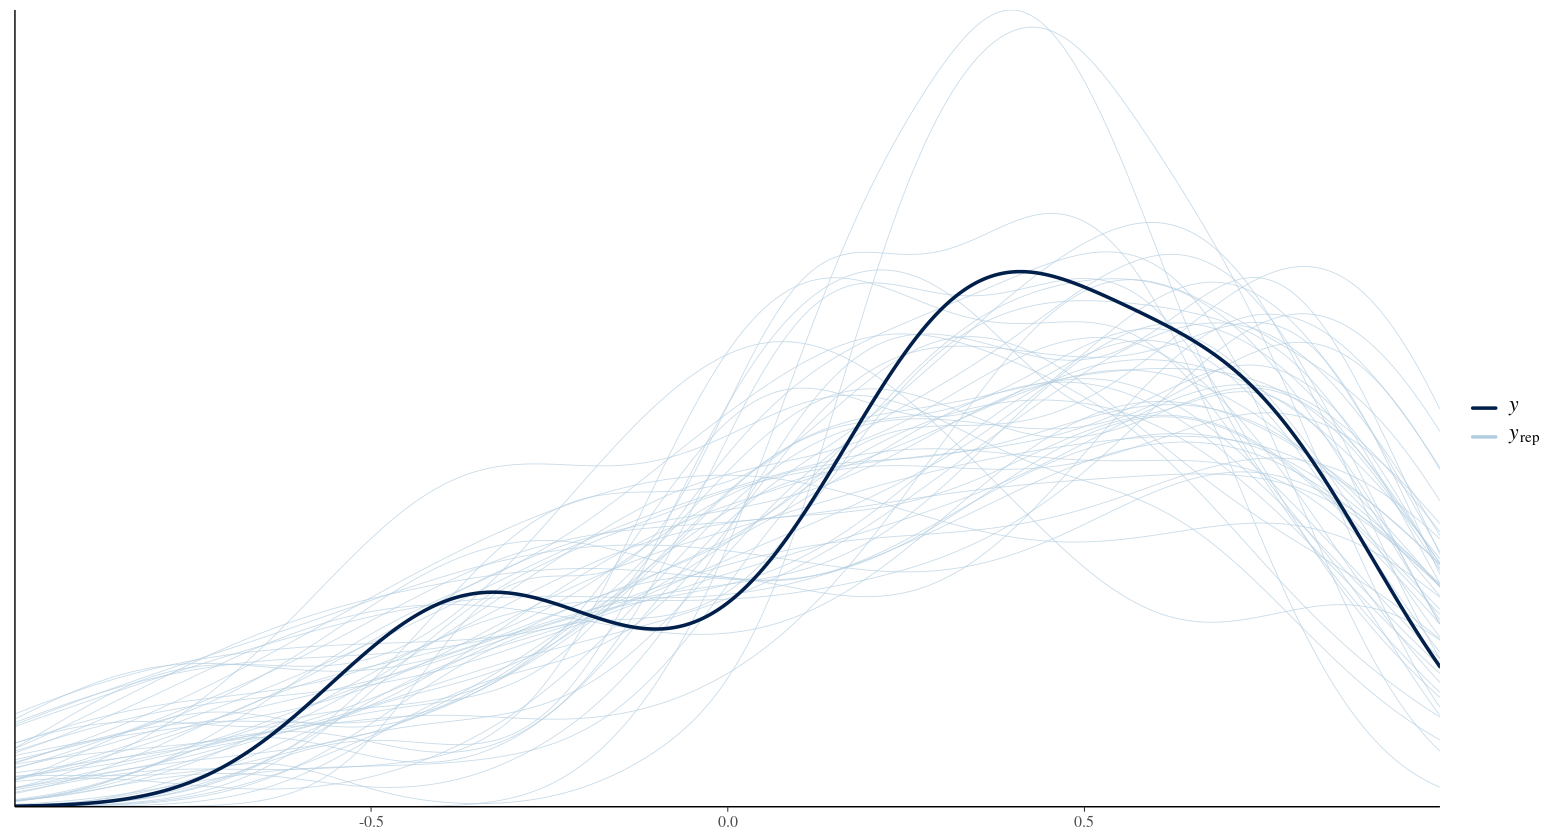

In [123]:
pp_check(m, ndraws=50)

In [124]:
summary(m)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: value | trunc(lb = -1, ub = 1) ~ predicted_corr 
   Data: filter(corr_df.Lateralization, variable == roi_) (Number of observations: 41) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
                  Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept             1.03      0.53     0.46     2.49 1.01      472      676
predicted_corrlow    -0.77      0.50    -2.13    -0.15 1.01      695      771

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.64      0.21     0.39     1.19 1.01      431      726

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [30]:
corr_df.Lateralization

predicted_corr participant variable    value
1  low            sub_00      fMotionArea  0.30
2  high           sub_00      fMotionArea  0.81
3  low            sub_00      fMotionArea  0.38
4  low            sub_00      fMotionArea  0.59
5  high           sub_00      fMotionArea  0.93
6  high           sub_00      fMotionArea  0.96
7  low            sub_00      fMotionArea  0.57
8  low            sub_0000    fMotionArea  0.55
9  high           sub_0000    fMotionArea  0.83
10 low            sub_0000    fMotionArea -0.16
11 low            sub_0000    fMotionArea  0.75
12 low            sub_0000    fMotionArea  0.04
13 high           sub_0000    fMotionArea  0.60
14 high           sub_0000    fMotionArea  0.70
15 high           sub_0000    fMotionArea  0.70
16 low            sub_0000    fMotionArea -0.08
17 low            sub_0000    fMotionArea  0.86
18 high           sub_0000    fMotionArea  0.89
19 high           sub_0000    fMotionArea  0.87
20 high           sub_0000    fMotionArea  0.96
21 high           sub_0000    fMotionArea  0.90
22 high           sub_0000    fMotionArea  0.53
23 low            sub_0000    fMotionArea  0.14
24 high           sub_0000    fMotionArea  0.92
25 low            sub_0000    fMotionArea  0.64
26 low            sub_0000    fMotionArea  0.37
27 low            sub_0000    fMotionArea  0.42
28 high           sub_0000    fMotionArea  0.97
29 high           sub_0000    fMotionArea  0.90
30 low            sub_0000    fMotionArea  0.81
⋮  ⋮              ⋮           ⋮           ⋮    
53 low            sub_0000    GFP         -0.45
54 high           sub_0000    GFP          0.79
55 high           sub_0000    GFP          0.17
56 high           sub_0000    GFP          0.51
57 low            sub_0000    GFP         -0.46
58 low            sub_0000    GFP          0.70
59 high           sub_0000    GFP          0.52
60 high           sub_0000    GFP          0.68
61 high           sub_0000    GFP         -0.21
62 high           sub_0000    GFP          0.68
63 high           sub_0000    GFP          0.19
64 low            sub_0000    GFP          0.32
65 high           sub_0000    GFP          0.80
66 low            sub_0000    GFP         -0.31
67 low            sub_0000    GFP          0.32
68 low            sub_0000    GFP          0.42
69 high           sub_0000    GFP          0.79
70 high           sub_0000    GFP          0.81
71 low            sub_0000    GFP          0.15
72 high           sub_0000    GFP          0.30
73 low            sub_0000    GFP         -0.48
74 high           sub_0000    GFP          0.33
75 low            sub_0000    GFP         -0.37
76 low            sub_0000    GFP          0.36
77 high           sub_0000    GFP          0.39
78 high           sub_0000    GFP          0.46
79 high           sub_0000    GFP          0.28
80 low            sub_0000    GFP          0.36
81 high           sub_0000    GFP          0.92
82 low            sub_0000    GFP          0.35

In [110]:
plted_

ERROR: Error in eval(expr, envir, enclos): object 'plted_' not found


In [124]:
priors_

prior        class     coef group resp dpar nlpar lb ub source
1 normal(0, 1) Intercept                            -1 1  user  
2 normal(0, 1) sigma                                0  NA user  
3 normal(0, 1) b                                    NA NA user

In [128]:
filter(corr_df.Lateralization, variable==roi_)

predicted_corr participant variable    value
1  low            sub_00      fMotionArea  0.30
2  high           sub_00      fMotionArea  0.81
3  low            sub_00      fMotionArea  0.38
4  low            sub_00      fMotionArea  0.59
5  high           sub_00      fMotionArea  0.93
6  high           sub_00      fMotionArea  0.96
7  low            sub_00      fMotionArea  0.57
8  low            sub_0000    fMotionArea  0.55
9  high           sub_0000    fMotionArea  0.83
10 low            sub_0000    fMotionArea -0.16
11 low            sub_0000    fMotionArea  0.74
12 low            sub_0000    fMotionArea  0.04
13 high           sub_0000    fMotionArea  0.60
14 high           sub_0000    fMotionArea  0.70
15 high           sub_0000    fMotionArea  0.70
16 low            sub_0000    fMotionArea -0.09
17 low            sub_0000    fMotionArea  0.86
18 high           sub_0000    fMotionArea  0.89
19 high           sub_0000    fMotionArea  0.87
20 high           sub_0000    fMotionArea  0.96
21 high           sub_0000    fMotionArea  0.90
22 high           sub_0000    fMotionArea  0.53
23 low            sub_0000    fMotionArea  0.14
24 high           sub_0000    fMotionArea  0.92
25 low            sub_0000    fMotionArea  0.64
26 low            sub_0000    fMotionArea  0.37
27 low            sub_0000    fMotionArea  0.42
28 high           sub_0000    fMotionArea  0.97
29 high           sub_0000    fMotionArea  0.90
30 low            sub_0000    fMotionArea  0.81
31 high           sub_0000    fMotionArea  0.78
32 low            sub_0000    fMotionArea  0.77
33 high           sub_0000    fMotionArea  0.91
34 low            sub_0000    fMotionArea  0.68
35 low            sub_0000    fMotionArea  0.66
36 high           sub_0000    fMotionArea  0.91
37 high           sub_0000    fMotionArea  0.89
38 high           sub_0000    fMotionArea  0.60
39 low            sub_0000    fMotionArea  0.18
40 high           sub_0000    fMotionArea  0.96
41 low            sub_0000    fMotionArea  0.49

In [129]:
mf_

value | trunc(lb = -1, ub = 1) ~ predicted_corr 

In [142]:
# FIT MODEL
capture.output({
    m = brm(
        mf_, 
        data = filter(corr_df.Lateralization, variable==roi_), 
        prior = priors_,
        sample_prior = TRUE, 
        # sample_prior = 'only', 
        family = gaussian(link="identity"),
        chains = 4,
        # iter = 1,
        cores = 4,
        save_pars = save_pars(all=TRUE),
        control = list(adapt_delta = 0.9, max_treedepth = 20))
    }, 
file="rstan.modelfit.output")

# posterior predicitive check
plted_ <- FALSE
while (!plted_){
    succ_ <- try(pp_ <- pp_check(m, ndraws=50))
    plted_ <- !any(grepl( 'Error', succ_, fixed = TRUE))
}
pp_

Compiling Stan program...

Start sampling



In [140]:
!any(grepl( 'Error', succ_, fixed = TRUE))

[1] TRUE

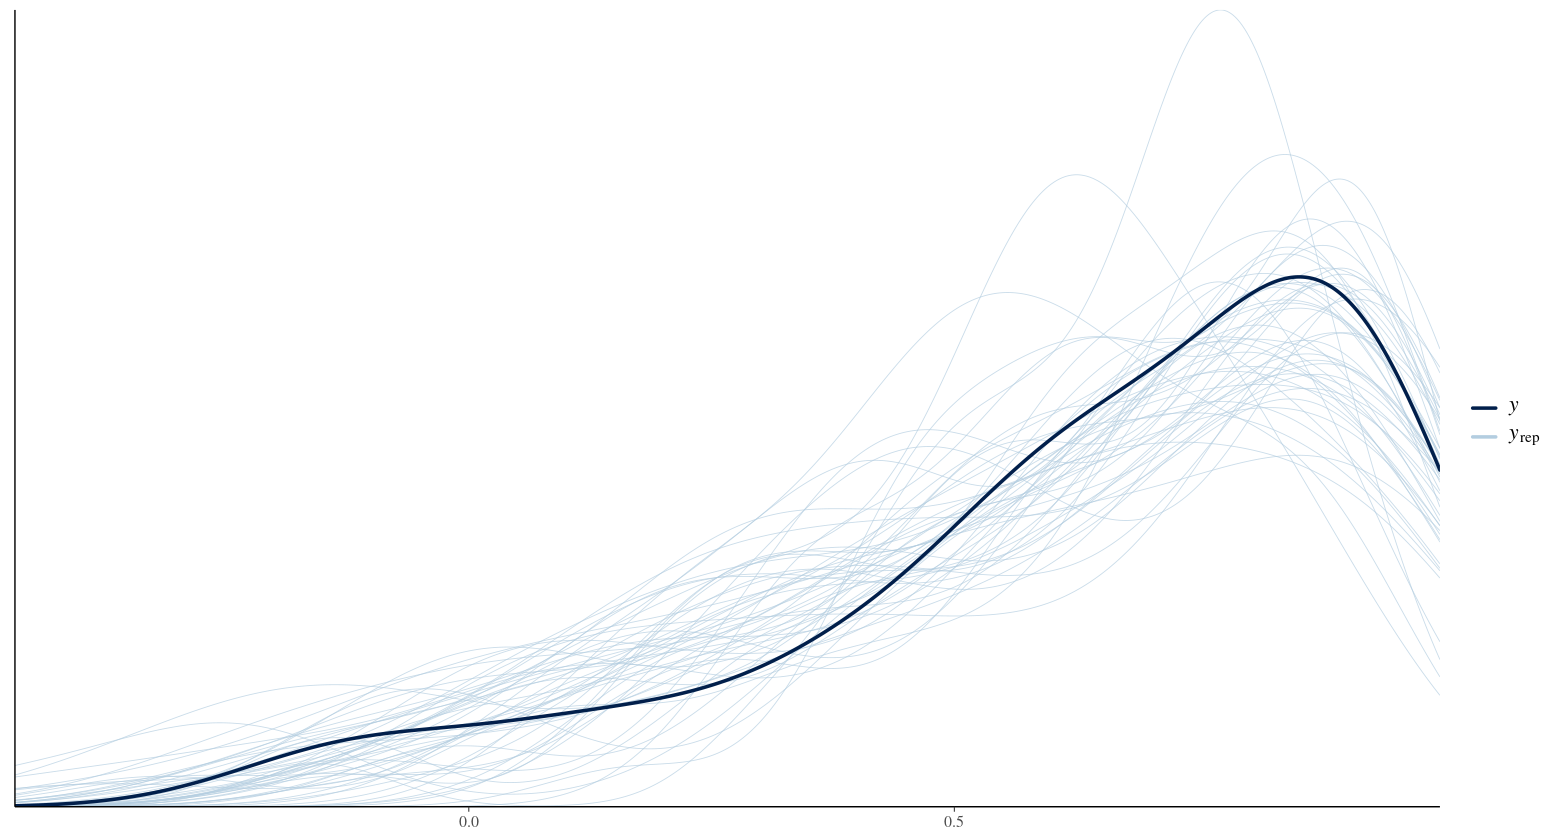

In [136]:
succ_

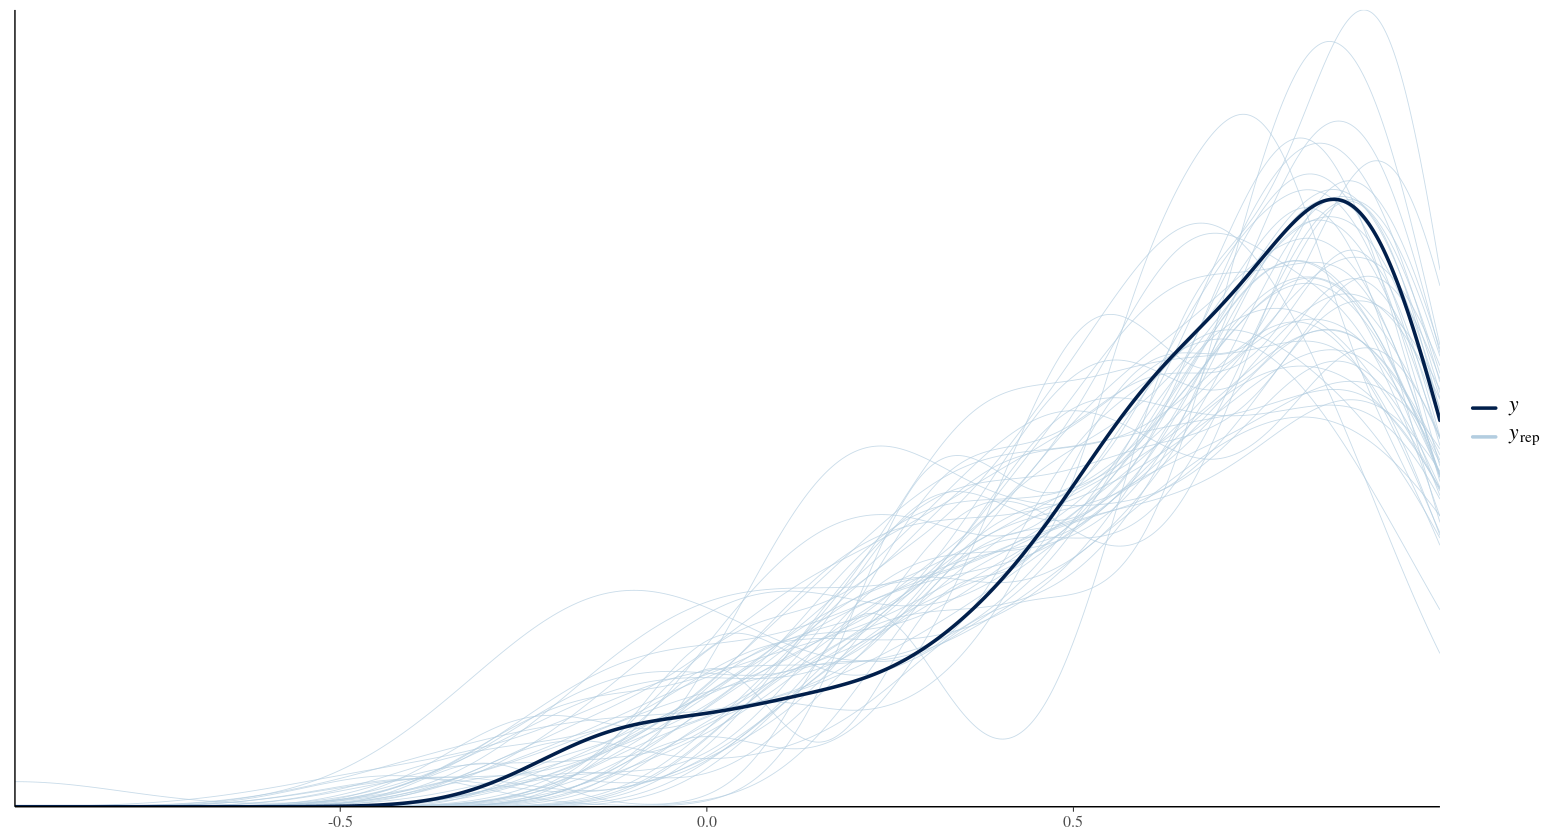

In [141]:
plted_ <- FALSE
while (!plted_){
    succ_ <- try(pp_ <- pp_check(m, ndraws=50))
    plted_ <- !any(grepl( 'Error', succ_, fixed = TRUE))
}
pp_

Error in validate_predictions(yrep, N) : NAs not allowed in predictions.


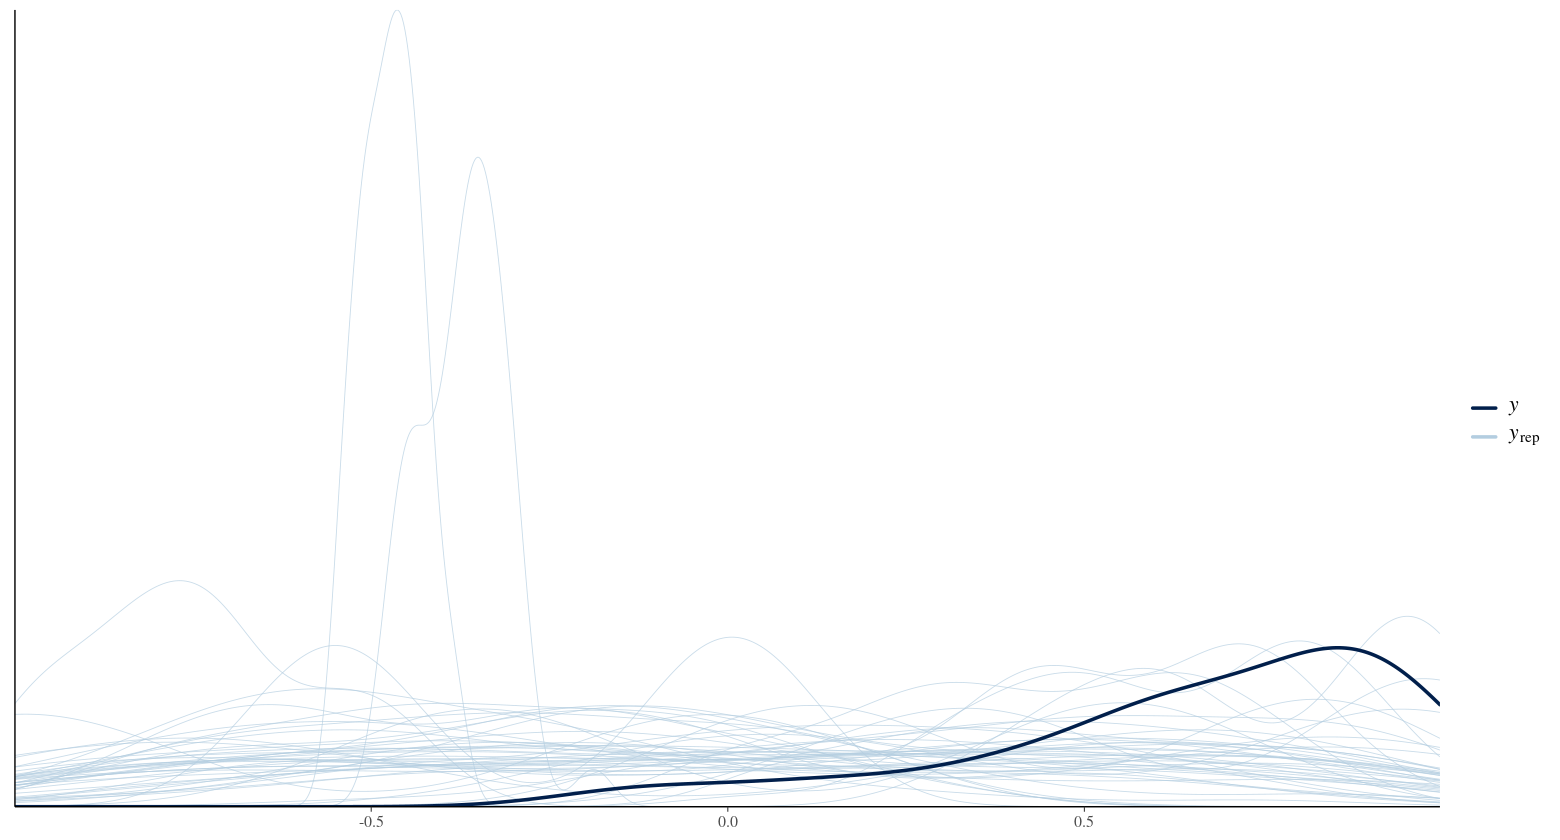

In [119]:
plted_ <- FALSE
while (!plted_){
        succ_ <- try(pp_ <- pp_check(m, ndraws=50))
        plted_ <- any(grepl( 'Error', succ_, fixed = TRUE))
    }

plot(pp_)

In [10]:
r_1 <- c('fMotionArea')
r_2 <- c('GFP')

corr_df.Condition <- melt(corr_df, id.vars=c('con', 'participant'), measure.vars=c(paste(r_1, collapse='_'), paste(r_2, collapse='_')))


In [11]:
corr_df.Condition

con       participant variable    value
1  same      sub_00      fMotionArea  0.30
2  same      sub_00      fMotionArea  0.81
3  same      sub_00      fMotionArea  0.38
4  same      sub_00      fMotionArea  0.59
5  same      sub_00      fMotionArea  0.93
6  same      sub_00      fMotionArea  0.96
7  same      sub_00      fMotionArea  0.57
8  same      sub_0000    fMotionArea  0.55
9  same      sub_0000    fMotionArea  0.83
10 same      sub_0000    fMotionArea -0.16
11 same      sub_0000    fMotionArea  0.74
12 different sub_0000    fMotionArea  0.04
13 different sub_0000    fMotionArea  0.60
14 different sub_0000    fMotionArea  0.70
15 different sub_0000    fMotionArea  0.70
16 different sub_0000    fMotionArea -0.09
17 different sub_0000    fMotionArea  0.86
18 same      sub_0000    fMotionArea  0.89
19 different sub_0000    fMotionArea  0.87
20 different sub_0000    fMotionArea  0.96
21 different sub_0000    fMotionArea  0.90
22 same      sub_0000    fMotionArea  0.53
23 same      sub_0000    fMotionArea  0.14
24 different sub_0000    fMotionArea  0.92
25 different sub_0000    fMotionArea  0.64
26 different sub_0000    fMotionArea  0.37
27 different sub_0000    fMotionArea  0.42
28 different sub_0000    fMotionArea  0.97
29 different sub_0000    fMotionArea  0.90
30 different sub_0000    fMotionArea  0.81
⋮  ⋮         ⋮           ⋮           ⋮    
53 different sub_0000    GFP         -0.45
54 different sub_0000    GFP          0.79
55 different sub_0000    GFP          0.17
56 different sub_0000    GFP          0.51
57 different sub_0000    GFP         -0.46
58 different sub_0000    GFP          0.69
59 same      sub_0000    GFP          0.53
60 different sub_0000    GFP          0.68
61 different sub_0000    GFP         -0.21
62 different sub_0000    GFP          0.68
63 same      sub_0000    GFP          0.19
64 same      sub_0000    GFP          0.32
65 different sub_0000    GFP          0.80
66 different sub_0000    GFP         -0.31
67 different sub_0000    GFP          0.32
68 different sub_0000    GFP          0.42
69 different sub_0000    GFP          0.79
70 different sub_0000    GFP          0.82
71 different sub_0000    GFP          0.15
72 different sub_0000    GFP          0.30
73 same      sub_0000    GFP         -0.48
74 same      sub_0000    GFP          0.33
75 same      sub_0000    GFP         -0.37
76 same      sub_0000    GFP          0.36
77 different sub_0000    GFP          0.39
78 same      sub_0000    GFP          0.46
79 different sub_0000    GFP          0.28
80 different sub_0000    GFP          0.35
81 same      sub_0000    GFP          0.92
82 same      sub_0000    GFP          0.35

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


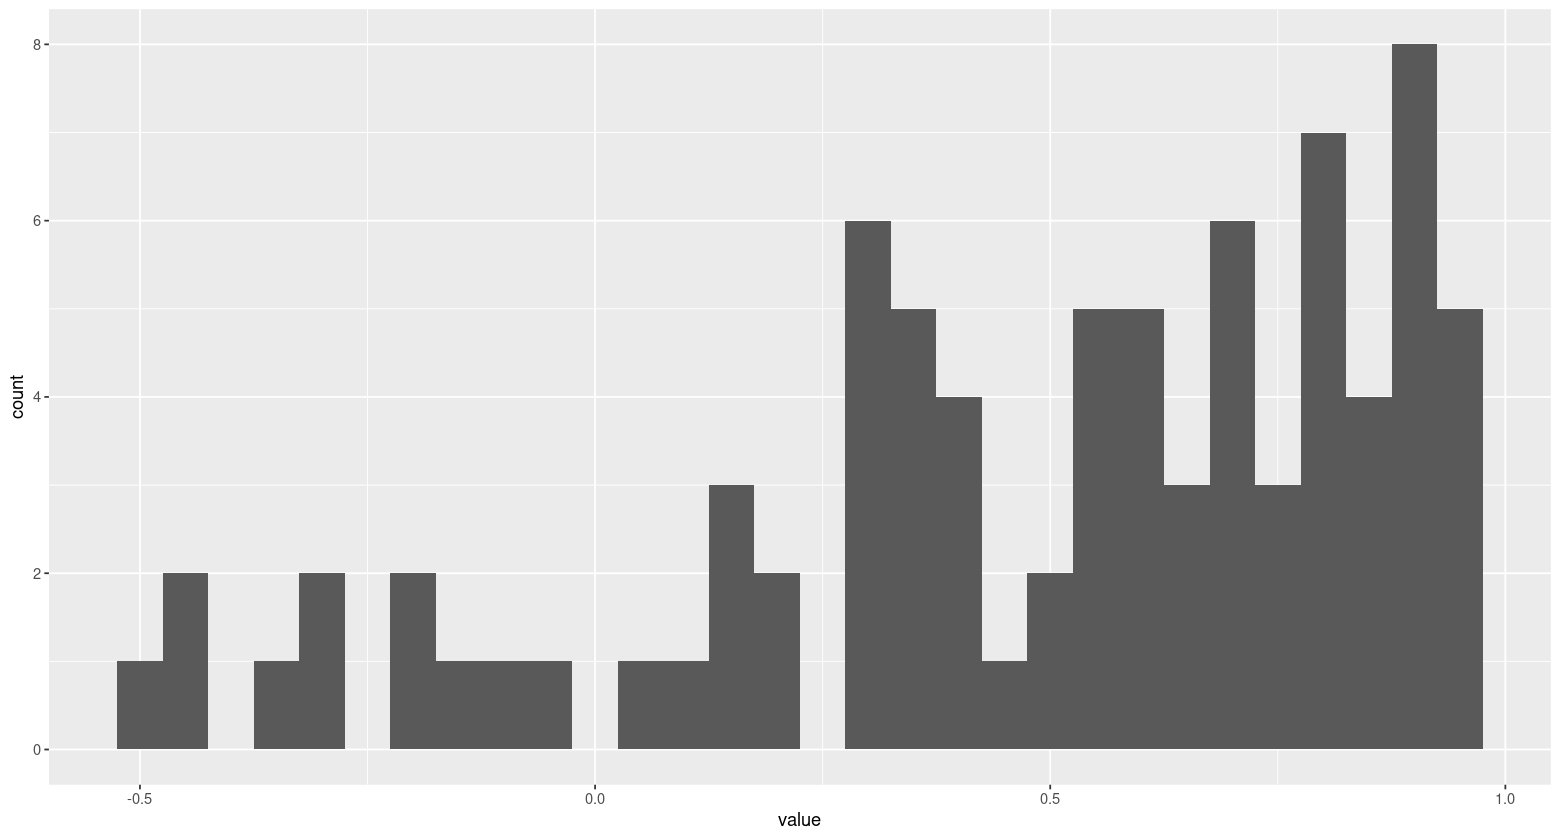

In [18]:
ggplot(corr_df.Condition, aes(x=value)) + 
    geom_histogram()


In [52]:
### modelling 
bfs_ <- c()


roi_ <- 'fMotionArea'

mf_ <- bf(
    value | trunc(lb=-1, ub=1) ~ con# + (con | participant)
)
get_prior(mf_,  data = corr_df.Condition)


## truncated priors:  effect only
priors_ = c(
    set_prior('normal(0, 1)', class='Intercept', lb=-1, ub=1),
    set_prior('normal(0, 1)', class='sigma', lb=0),
    set_prior('normal(0, 1)', class='b')
)



prior                  class     coef    group resp dpar nlpar lb ub source 
1                        b                                             default
2                        b         consame                             default
3 student_t(3, 0.6, 2.5) Intercept                                     default
4 student_t(3, 0, 2.5)   sigma                                   0     default

In [56]:

#
capture.output({
    m = brm(
        mf_, 
        data = filter(corr_df.Condition, variable==roi_), 
        prior = priors_,
        sample_prior = TRUE, 
        # sample_prior = 'only', 
        family = gaussian(link="identity"),
        chains = 4,
        # iter = 1,
        cores = 4,
        save_pars = save_pars(all=TRUE),
        control = list(adapt_delta = 0.9, max_treedepth = 20))
    }, 
file="rstan.modelfit.output")

Compiling Stan program...

Start sampling



In [104]:
succ_ <- try(pp_ <- pp_check(m, ndraws=50))

any(grepl( 'Error', succ_, fixed = TRUE))


[1] FALSE

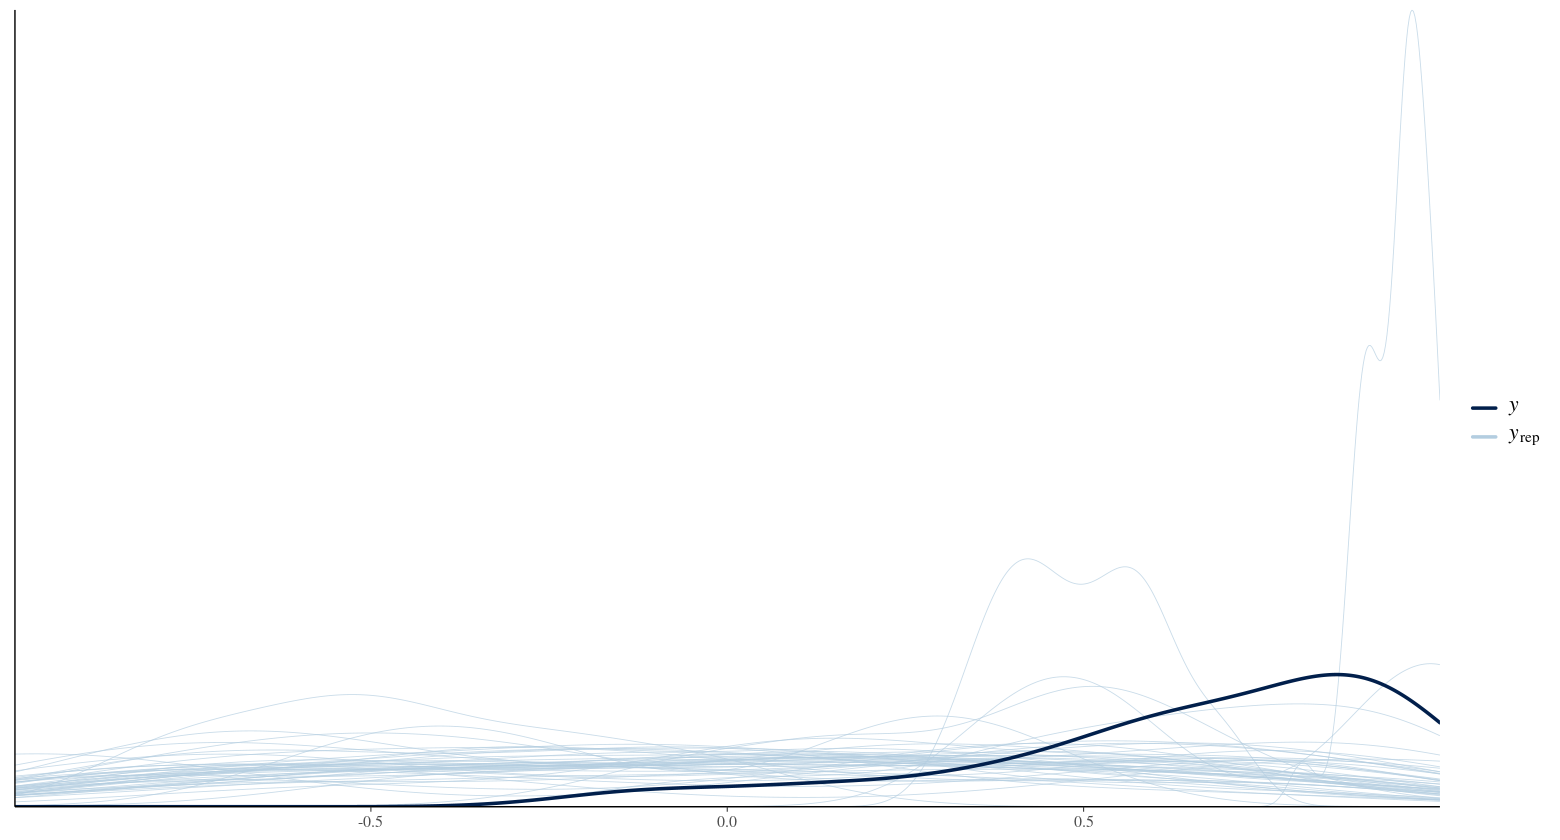

In [106]:
plot(pp_)

In [97]:
succ_[1]

[1] "Error in validate_predictions(yrep, N) : NAs not allowed in predictions.\n"

In [103]:
any(grepl( 'Error', succ_, fixed = TRUE))


[1] TRUE

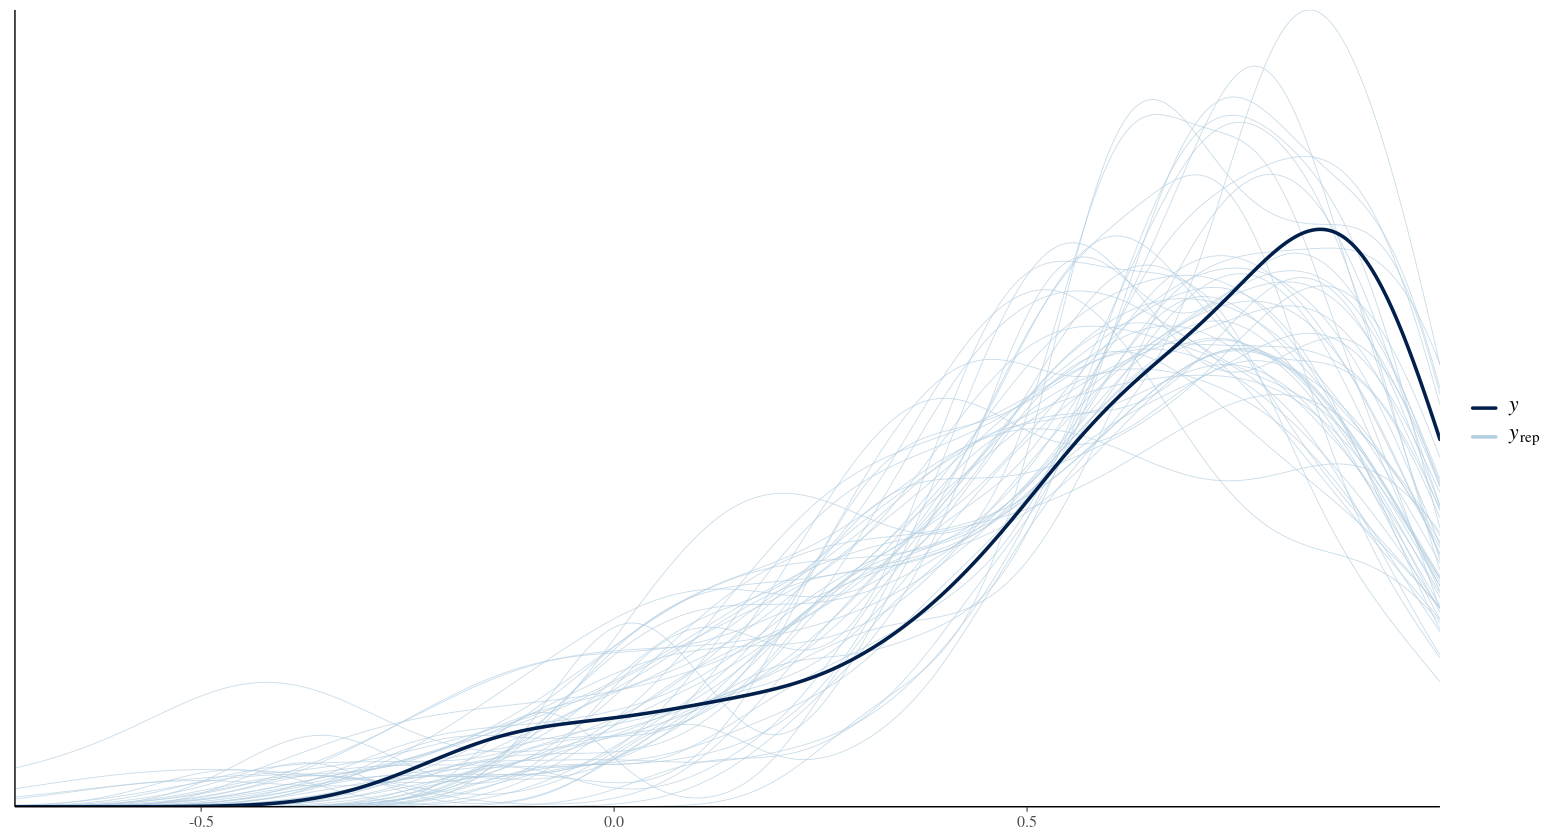

In [58]:
pp_check(m, ndraws=50)

In [ ]:
summary(m)

In [218]:
correlationBF(corr_df[, r_1], corr_df[, r_2])

Bayes factor analysis
--------------
[1] Alt., r=0.333 : 595.2886 ±0%

Against denominator:
  Null, rho = 0 
---
Bayes factor type: BFcorrelation, Jeffreys-beta*


In [200]:
corr_df[r_2]

GazeCubes
8   0.15    
9   0.52    
10  0.66    
11  0.41    
12  0.56    
13  0.51    
14  0.75    
15  0.55    
16 -0.08    
17  0.48    
18  0.69    
19  0.88    
20  0.59    
21  0.80    
22  0.54    
23  0.85    
24  0.87    
25  0.07    
26  0.80    
27  0.49    
28 -0.09    
29  0.33    
30 -0.53    
31 -0.02    
32 -0.28    
33  0.26    
34 -0.42    
35  0.40    
36  0.56    
37  0.73    
38  0.23    
39 -0.19    
40  0.22    
41 -0.15

In [ ]:
# corr_df.hemisphere <- melt(corr_df, id.vars=c('con', 'participant'), measure.vars=c('fMA_val','GFP_val'))

# box_condition <- ggplot(corr_df.Condition, aes(x=variable, y=value, fill=con)) + 
#     geom_boxplot(color='black', show.legend=FALSE) + 
#     annotate("rect", xmin=0.5, xmax=2.5, ymin=-rho_thr, ymax=rho_thr, alpha=0.5, fill='grey') +
#     theme(
#         panel.background = element_rect(fill='white', colour='black')) + 
#     scale_fill_manual(labels = c("different conditions", "same conditions"), values=c("orangered2", "gray20")) + 
#     scale_x_discrete(labels= c('MT+', 'GFP')) +
#     xlab("ROI") + 
#     ylab(expression(rho)) + 
#     labs(fill = "Correlation between:") +
#     xlab("") +
#     theme(
#         # aspect.ratio = 0.8,
#         panel.background = element_rect(fill='white', colour='black'),
#         axis.text.x = element_text(color=" black", 
#                            size=8, angle=0),
#         axis.text.y = element_text(color="black", 
#                            size=8, angle=0),
#         axis.title=element_text(size=8)
#         )